# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Générer-quelques-figures" data-toc-modified-id="Générer-quelques-figures-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Générer quelques figures</a></div><div class="lev2 toc-item"><a href="#Dépendences-et-données" data-toc-modified-id="Dépendences-et-données-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dépendences et données</a></div><div class="lev2 toc-item"><a href="#Affichage" data-toc-modified-id="Affichage-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Affichage</a></div><div class="lev2 toc-item"><a href="#Pour-plusieurs-valeurs" data-toc-modified-id="Pour-plusieurs-valeurs-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Pour plusieurs valeurs</a></div><div class="lev2 toc-item"><a href="#Pour-plusieurs-valeurs" data-toc-modified-id="Pour-plusieurs-valeurs-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Pour plusieurs valeurs</a></div><div class="lev2 toc-item"><a href="#Voir-les-échantillons-arriver" data-toc-modified-id="Voir-les-échantillons-arriver-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Voir les échantillons arriver</a></div>

# Générer quelques figures

## Dépendences et données

In [57]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 8)
mpl.rcParams['figure.dpi'] = 120
import seaborn as sns
sns.set(context="notebook", style="darkgrid", palette="hls", font="sans-serif", font_scale=1.8)

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
mus = {
    'facile': [0.9, 0.1],
    'moyen': [0.6, 0.4],
    'difficile': [0.5, 0.49],
}

In [85]:
Ts = {
    'facile': 200,
    'moyen': 50,
    'difficile': 10,
}

In [86]:
difficultes = list(mus.keys())

## Affichage

In [99]:
def voir_echantillons(mu, dmu, T, dT, savefig=None):
    echantillons = np.zeros(T)
    temps = np.arange(1, T + 1)
    mu_avant, mu_apres = mu[0], mu[1]
    T_avant = T//2
    echantillons[:T_avant] = np.random.binomial(1, mu_avant, T_avant)
    echantillons[T_avant:] = np.random.binomial(1, mu_apres, T_avant)
    
    fig = plt.figure()
    plt.xlabel(r"Temps discret des échantillons $n = 1, \dots, {}$".format(T))
    plt.ylabel(r"Échantillons $X_1, \dots, X_n \in [0,1]$")
    plt.title(r"Échantillons aléatoires, avec une rupture à un certain temps")
    plt.plot(temps, echantillons, 'ro', markersize=8)    
    if savefig:
        plt.savefig(savefig + "__mu_" + dmu + "__T_" + dT + "_inconnu.png")
        plt.savefig(savefig + "__mu_" + dmu + "__T_" + dT + "_inconnu.pdf")
    else:
        plt.show()
    
    fig = plt.figure()
    plt.xlabel(r"Temps discret des échantillons $n = 1, \dots, {}$".format(T))
    plt.ylabel(r"$X_1 \dots X_{} \sim B({})$ et $X_{}, \dots, X_{} \sim B({})$".format(
        "{%s}" % T_avant, mu_avant, "{%s}" % T_avant, "{%s}" % T, mu_apres)
    )
    plt.title(r"Échantillons aléatoires, avec une rupture au temps {}".format(T_avant + 1))
    plt.plot(temps, echantillons, 'ro', markersize=8)    
    plt.hlines(mu_avant, 1, T_avant + 1, linestyles=':', lw=4, color='blue')
    plt.hlines(mu_apres, T_avant + 1, T, linestyles=':', lw=4, color='blue')
    plt.vlines(T_avant + 1, 0, 1, linestyles='--', lw=4, color='orange')
    
    if savefig:
        plt.savefig(savefig + "__mu_" + dmu + "__T_" + dT + "_connu.png")
        plt.savefig(savefig + "__mu_" + dmu + "__T_" + dT + "_connu.pdf")
    else:
        plt.show()
    # return fig

## Pour plusieurs valeurs

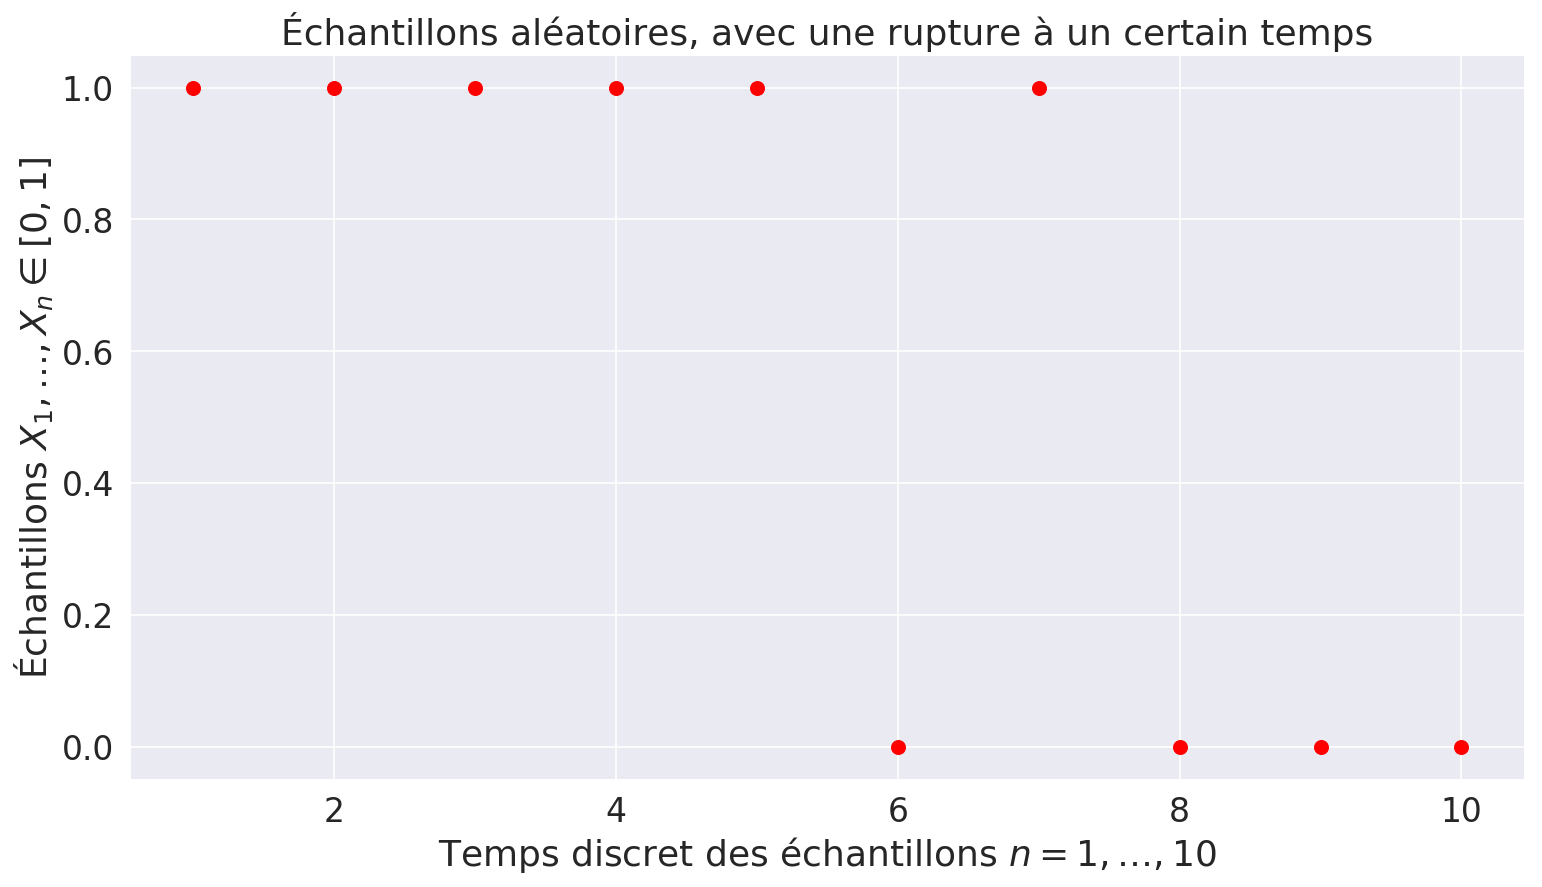

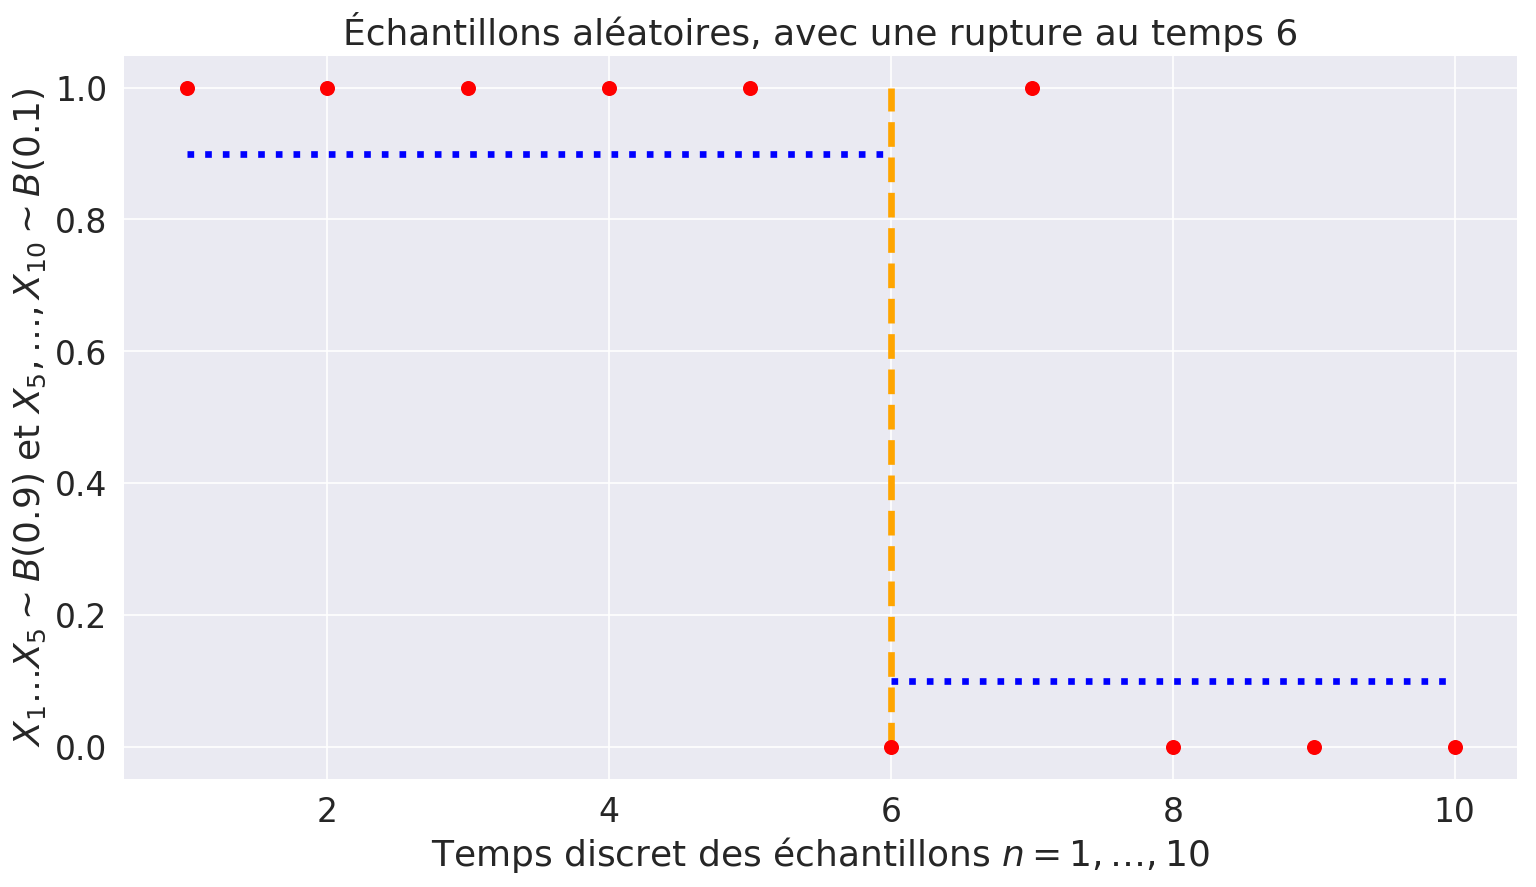

In [100]:
voir_echantillons([0.9, 0.1], "facile", 10, "facile", "test")

## Pour plusieurs valeurs

In [94]:
import itertools

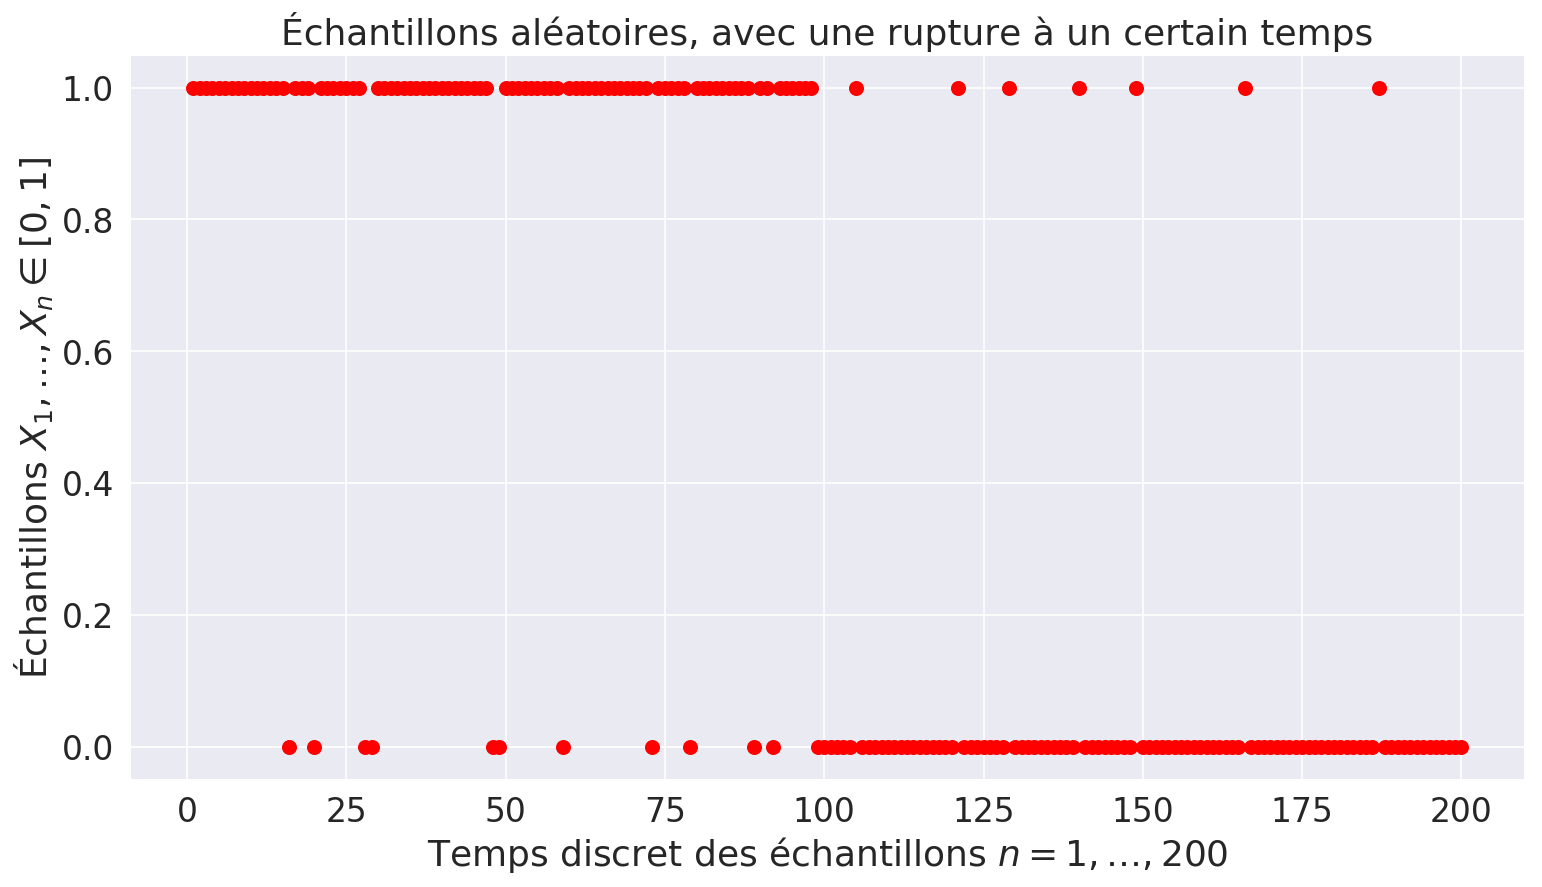

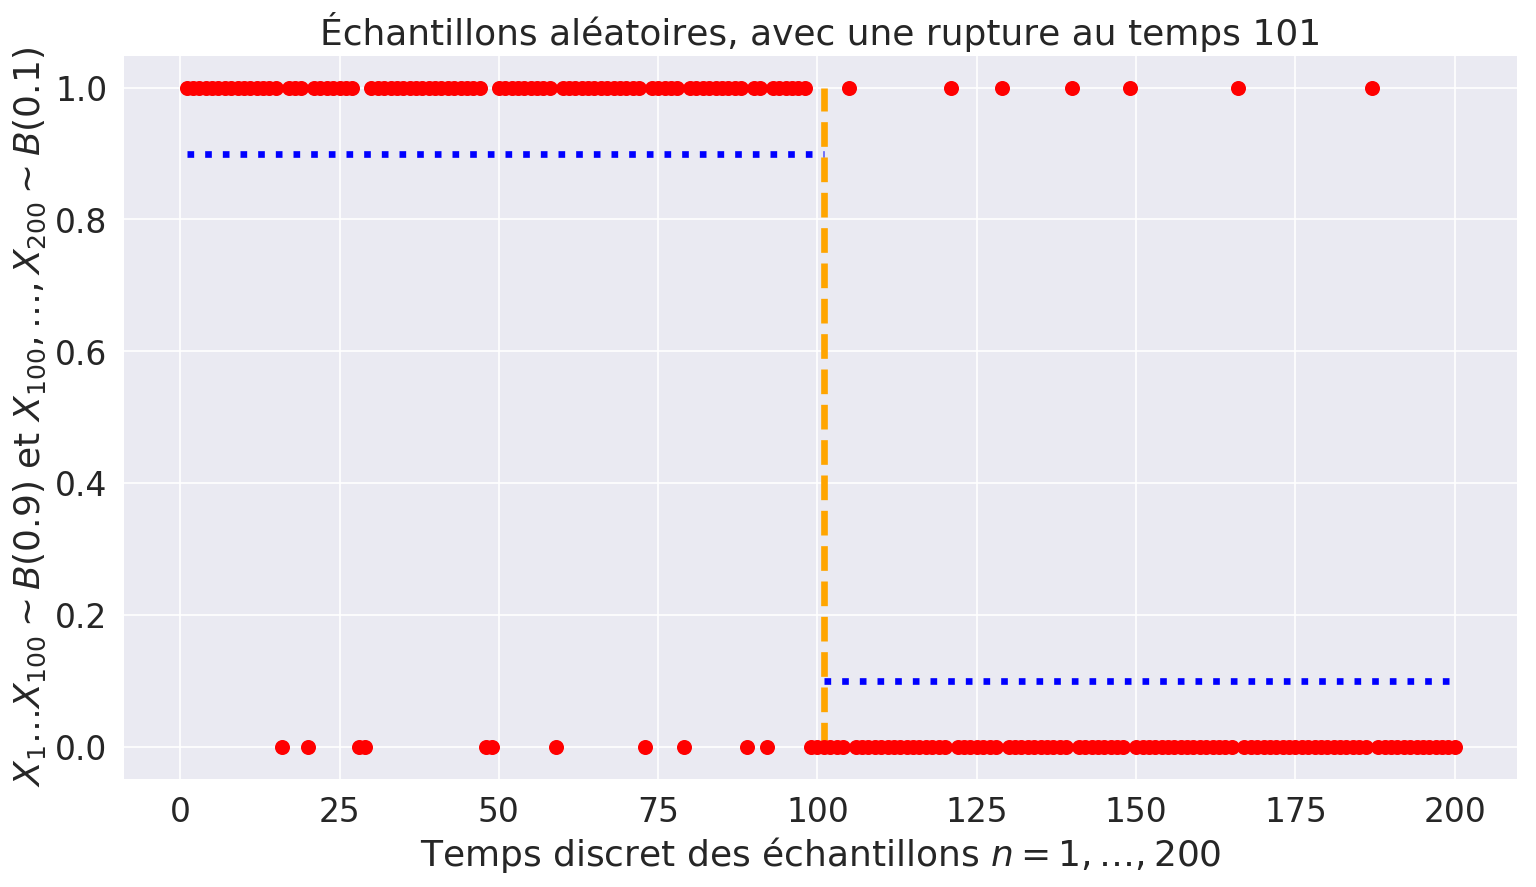

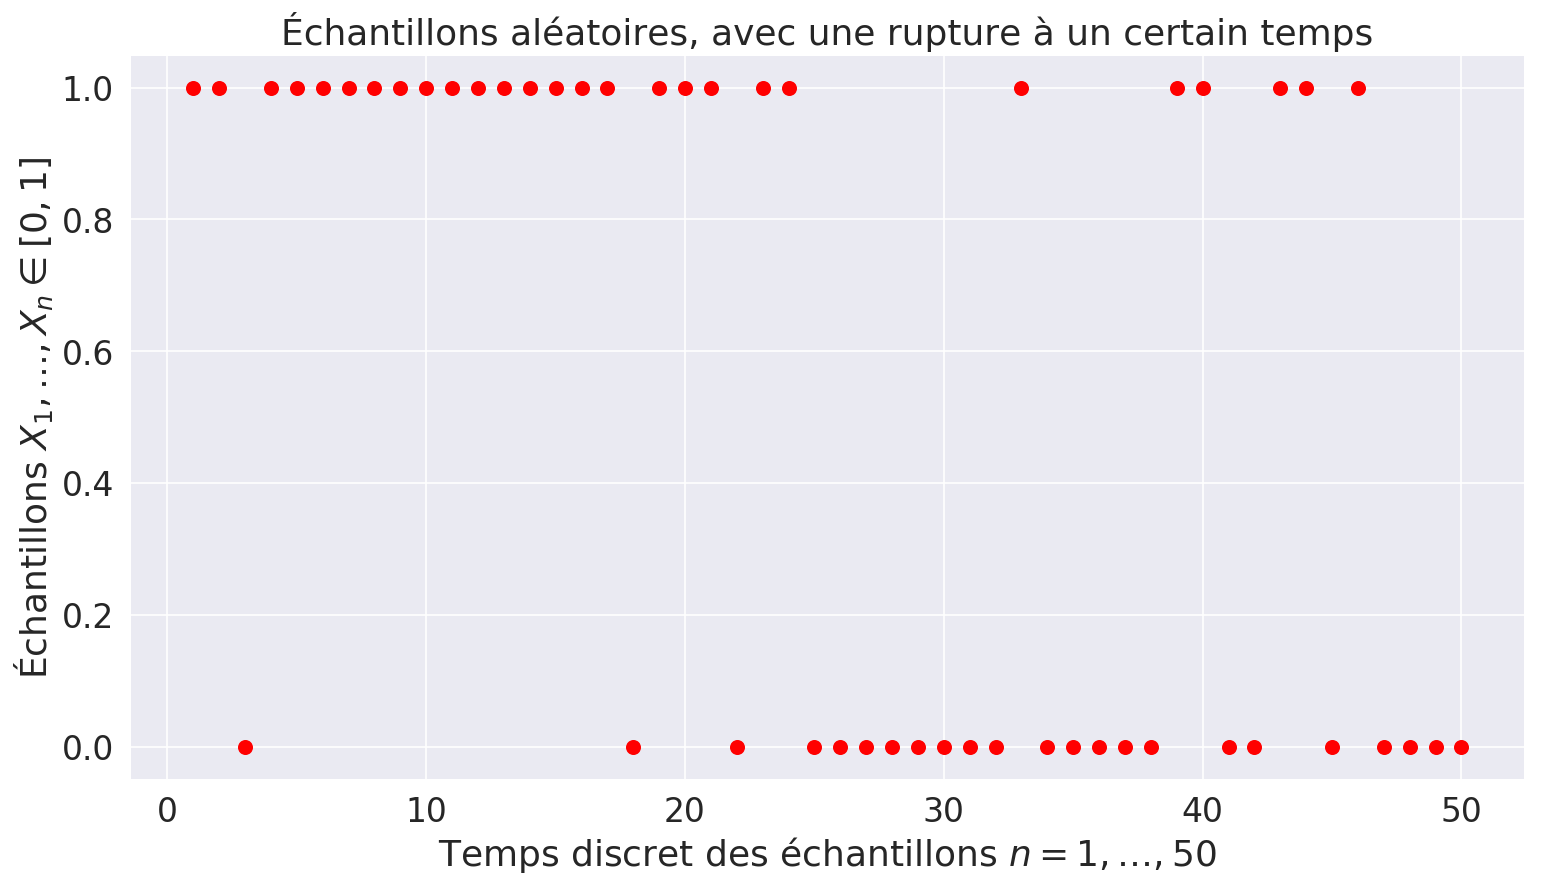

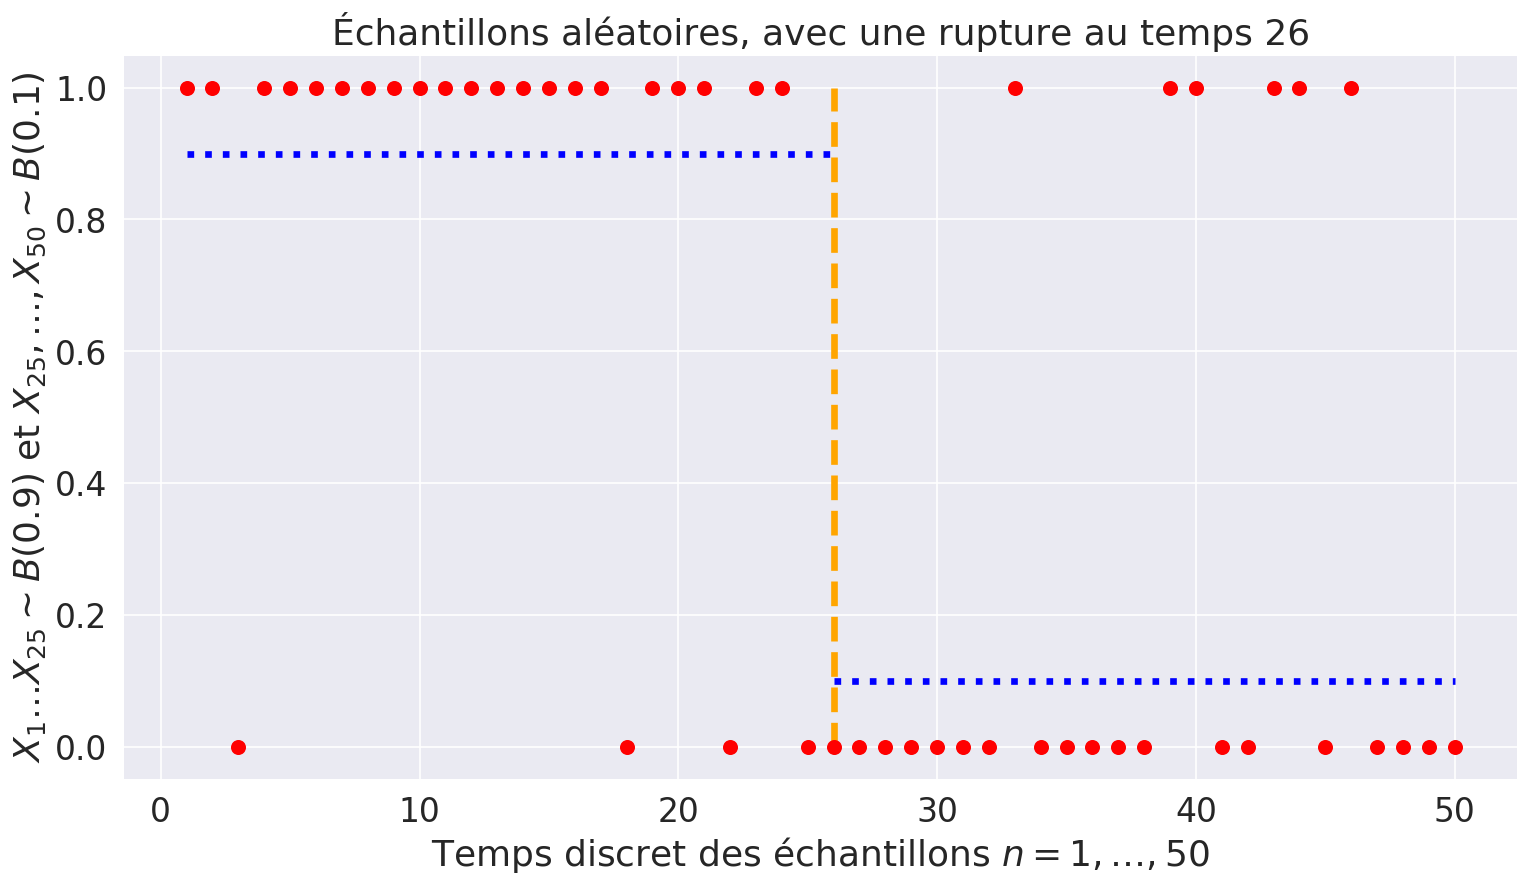

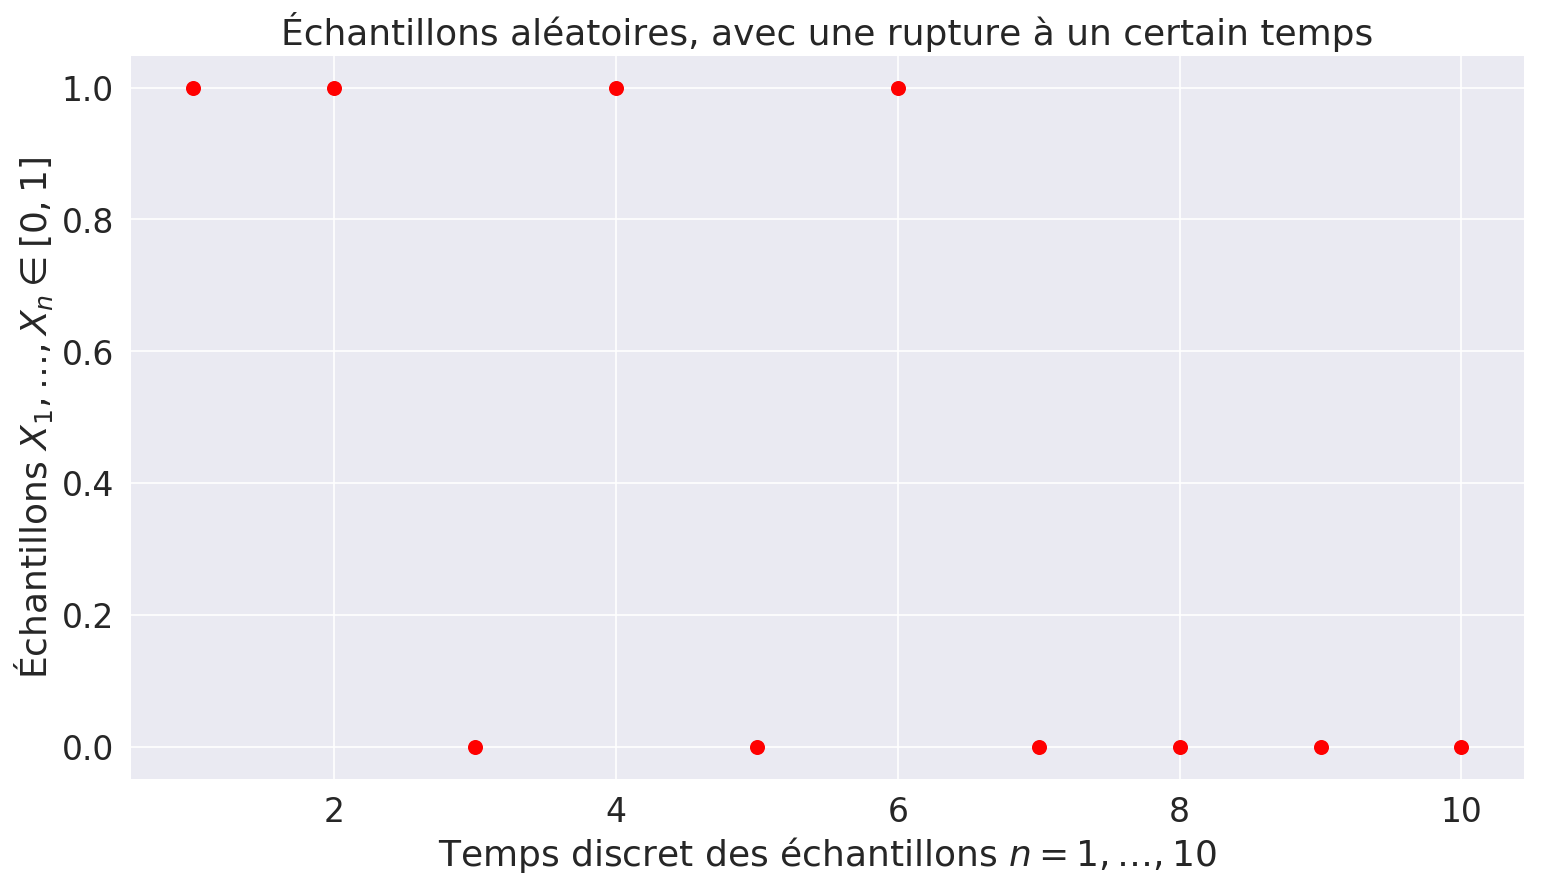

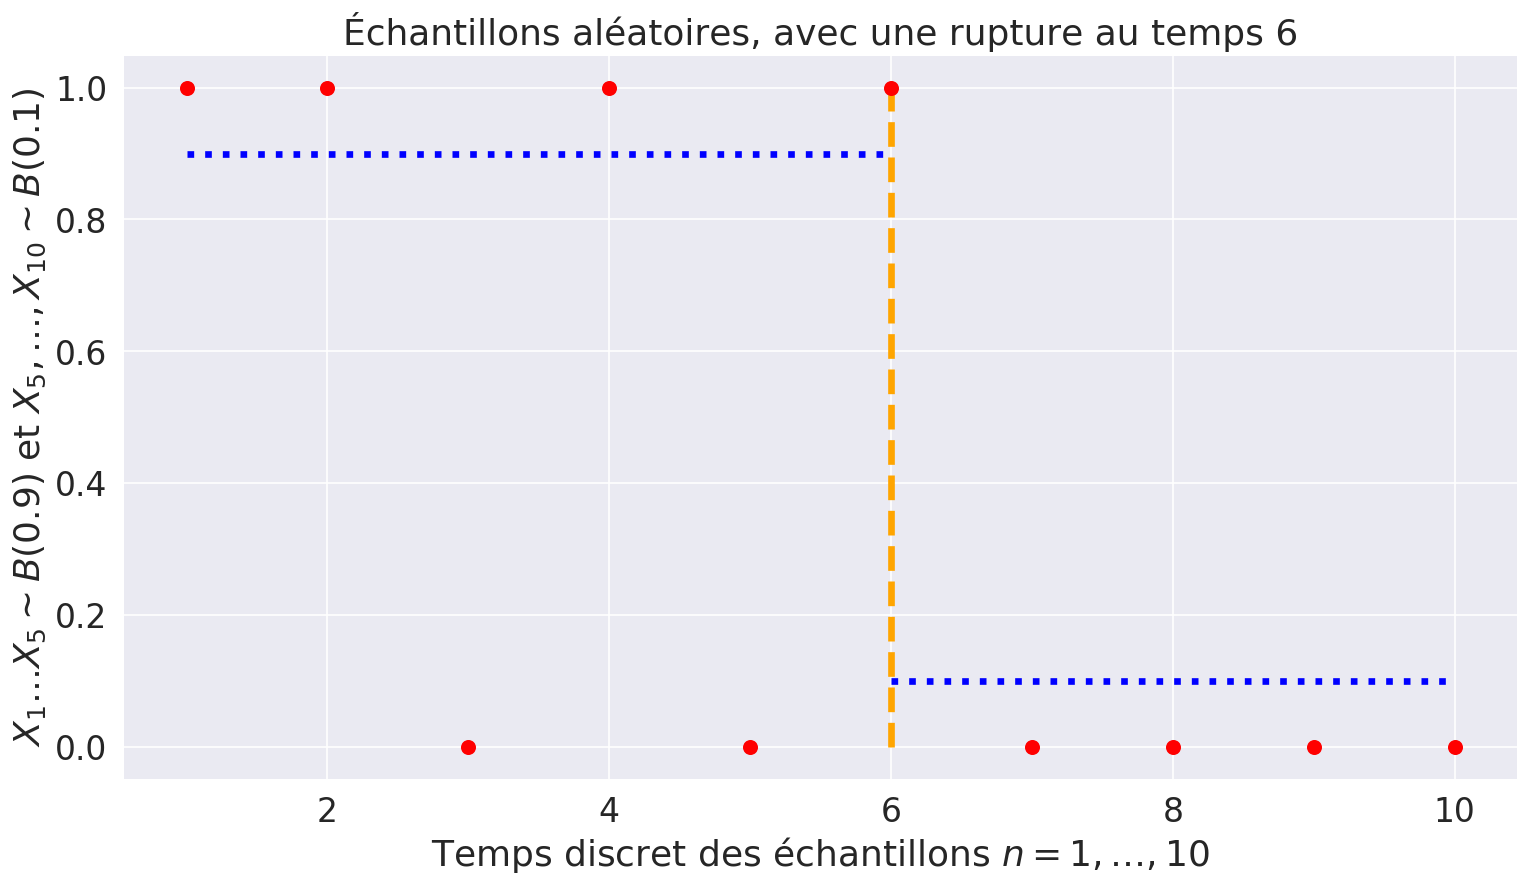

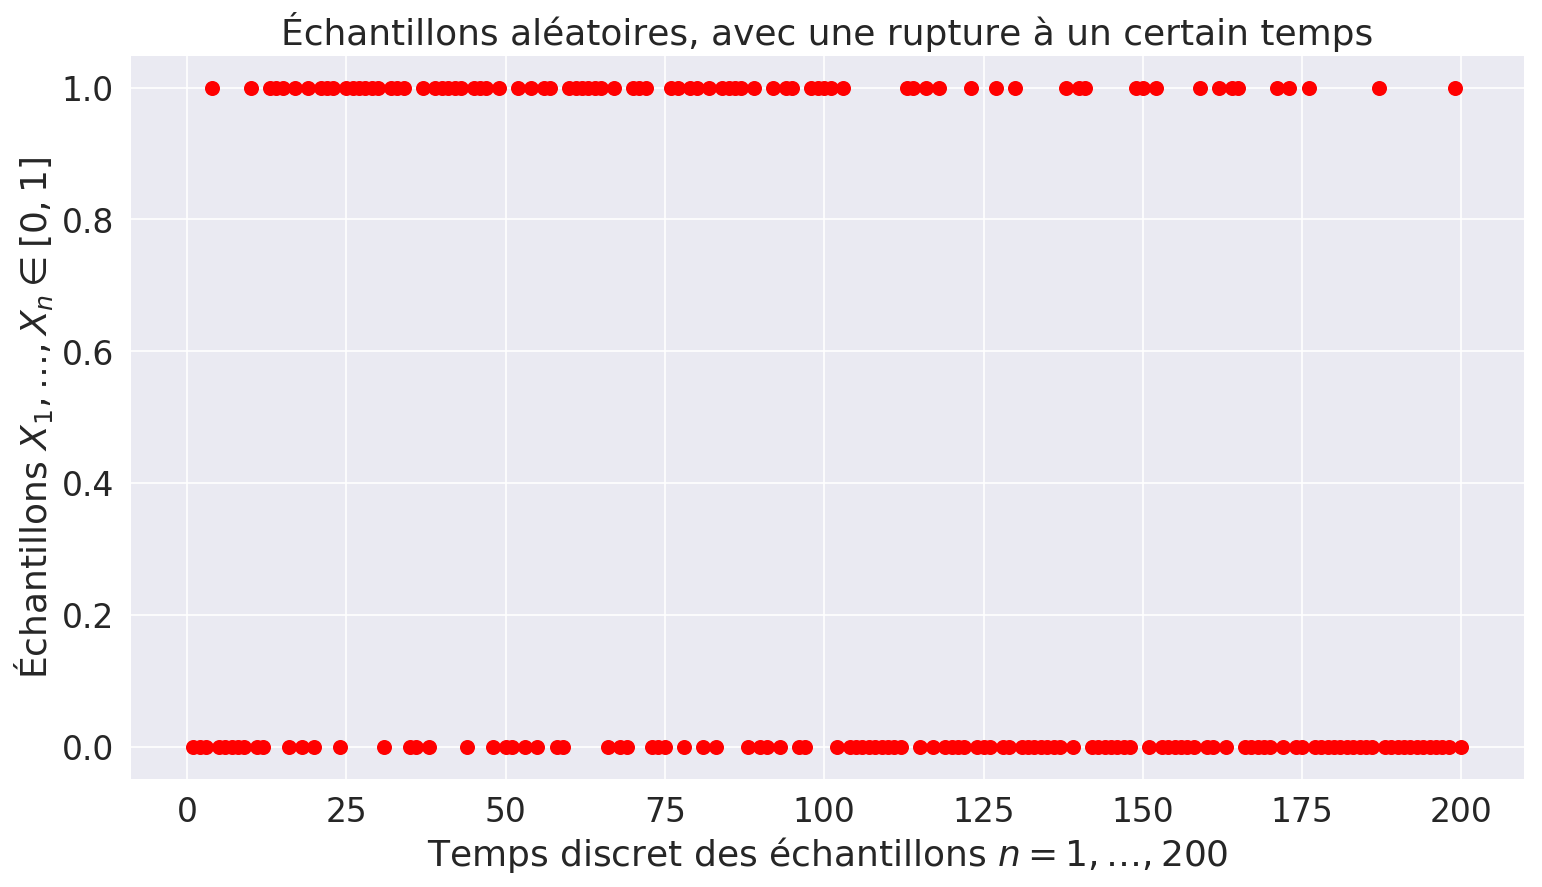

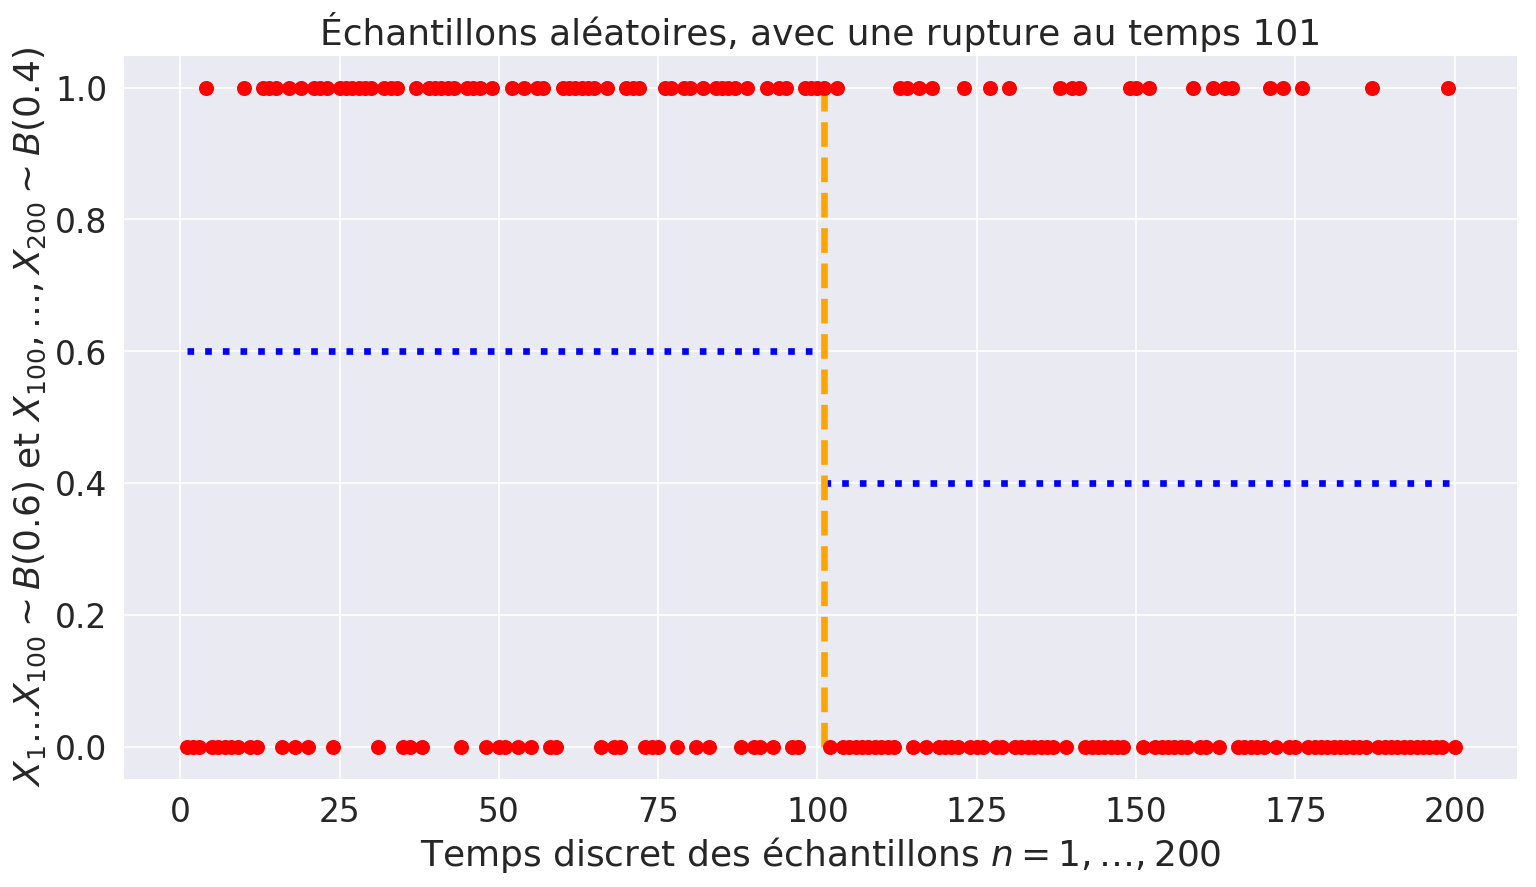

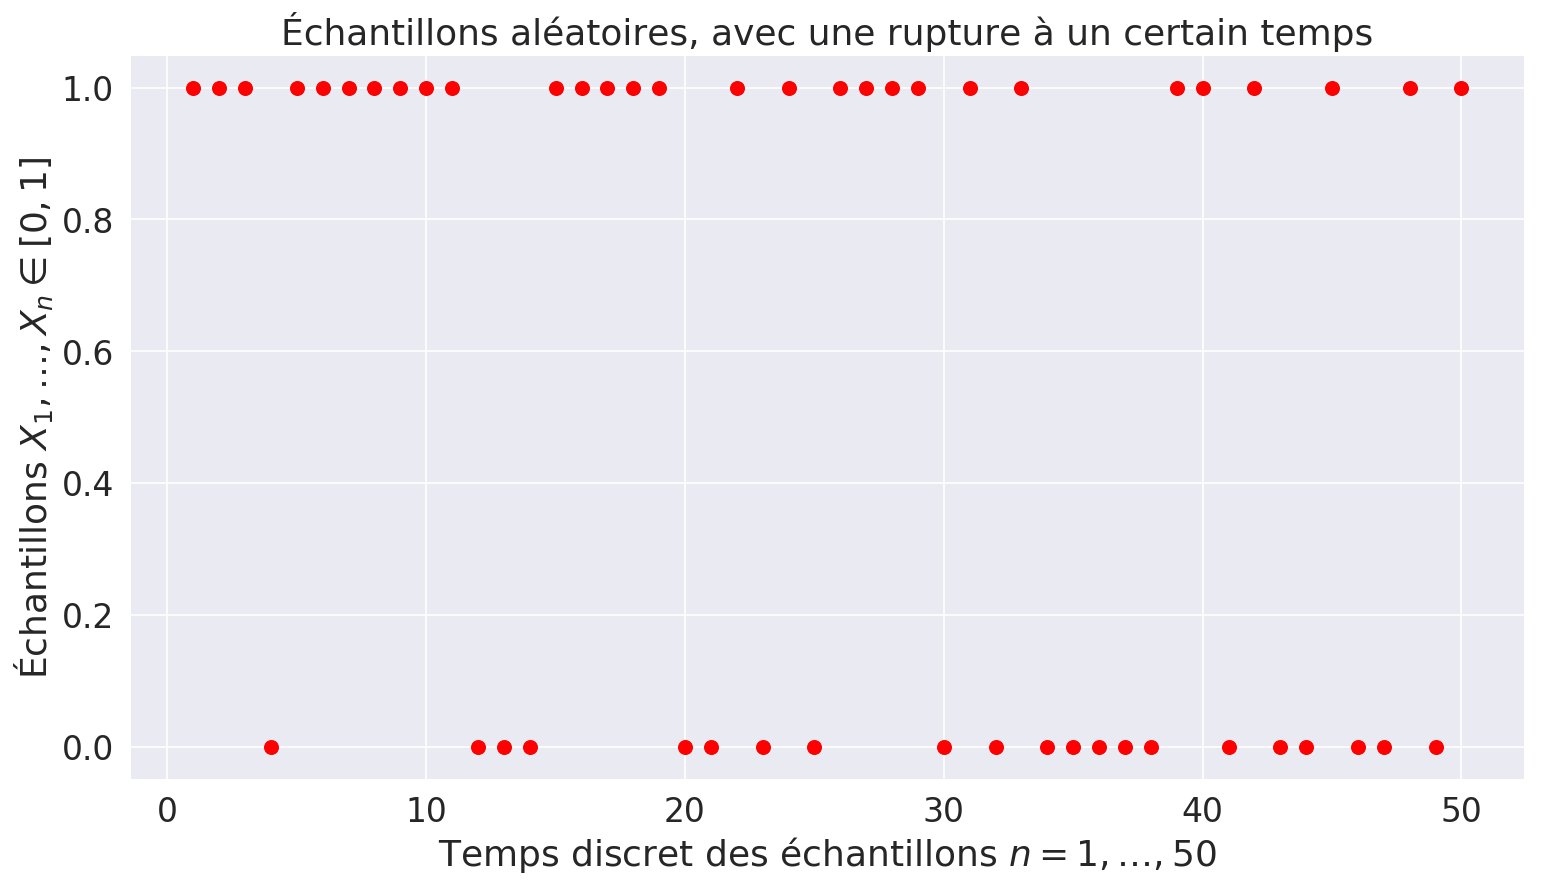

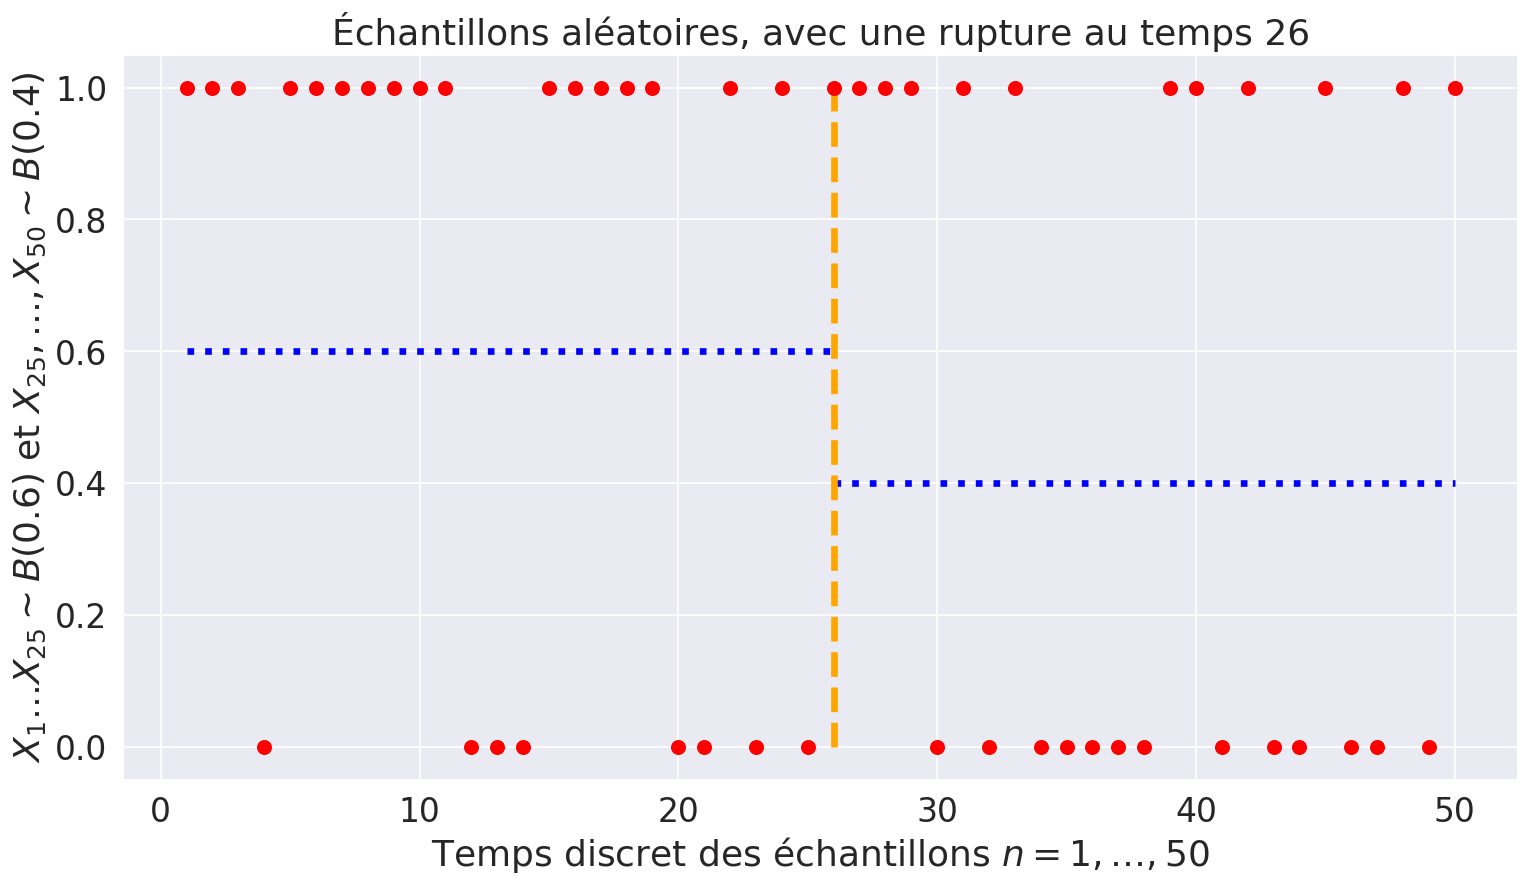

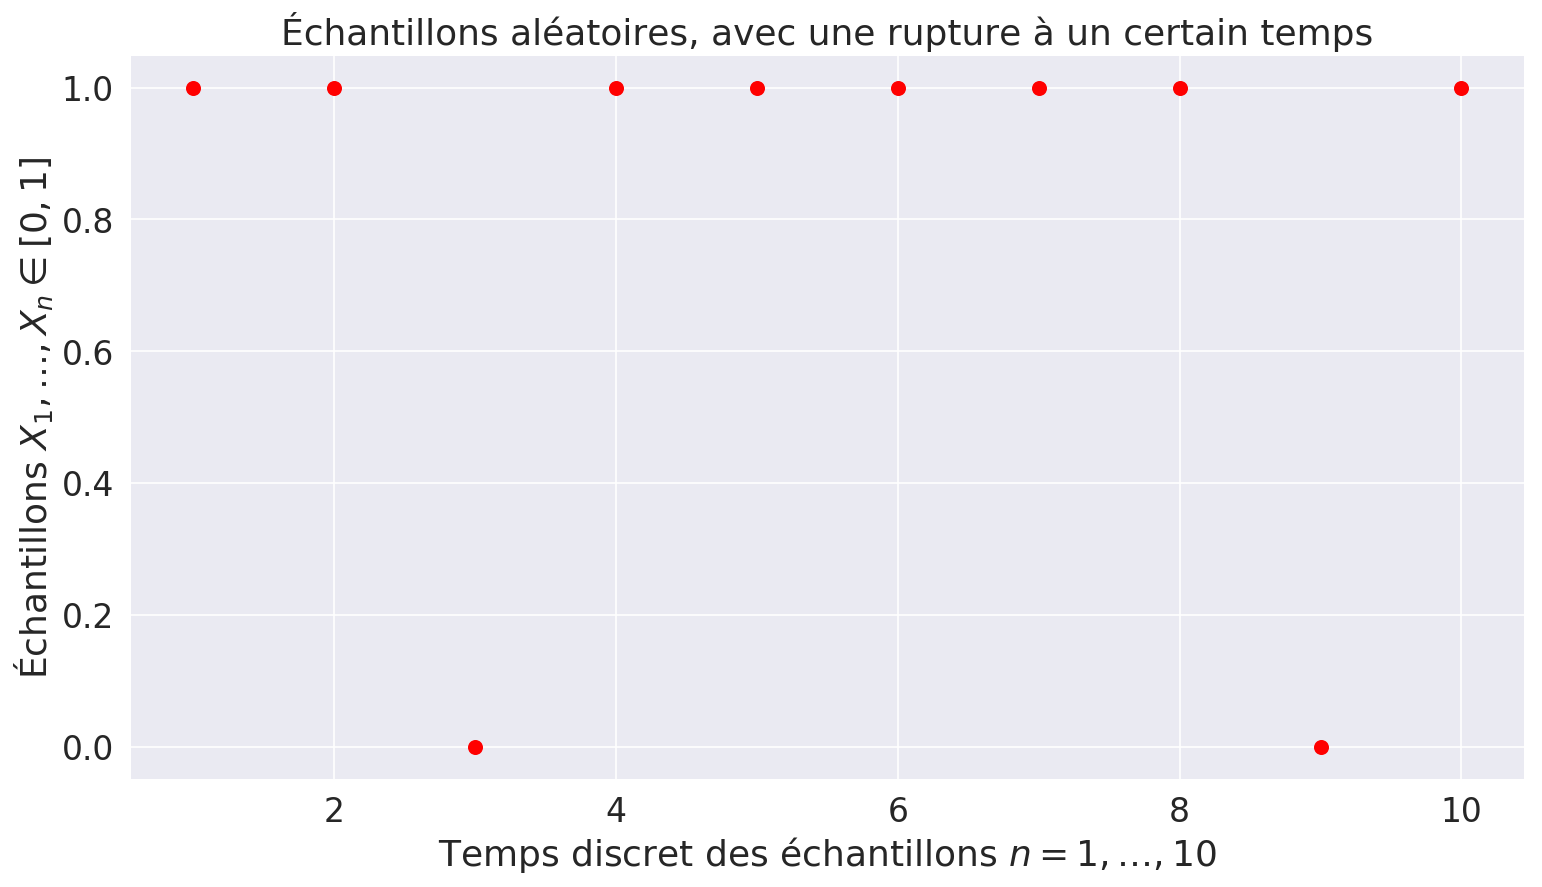

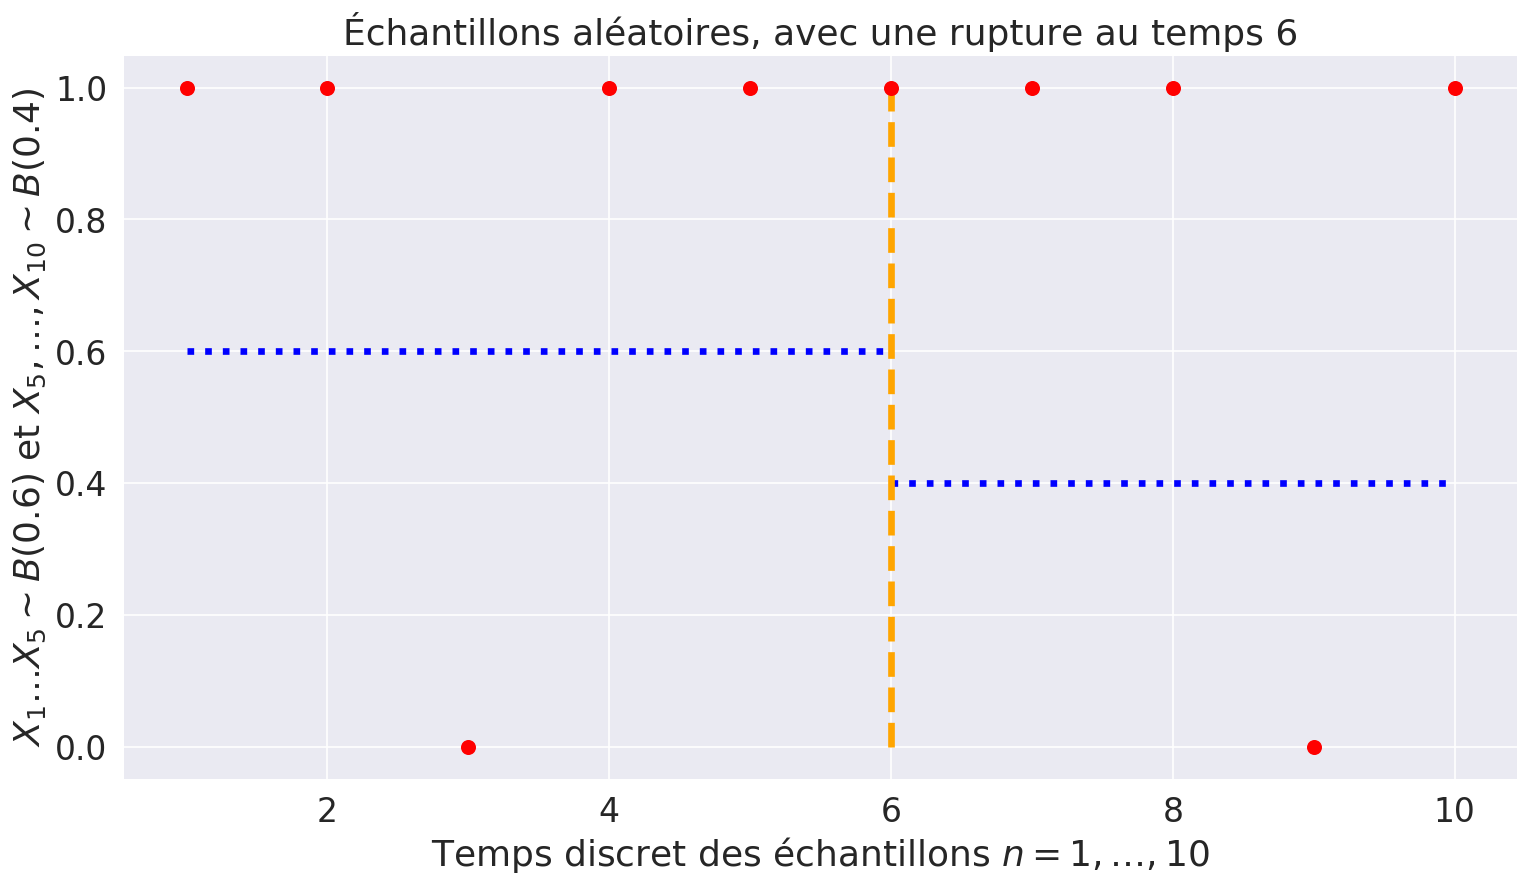

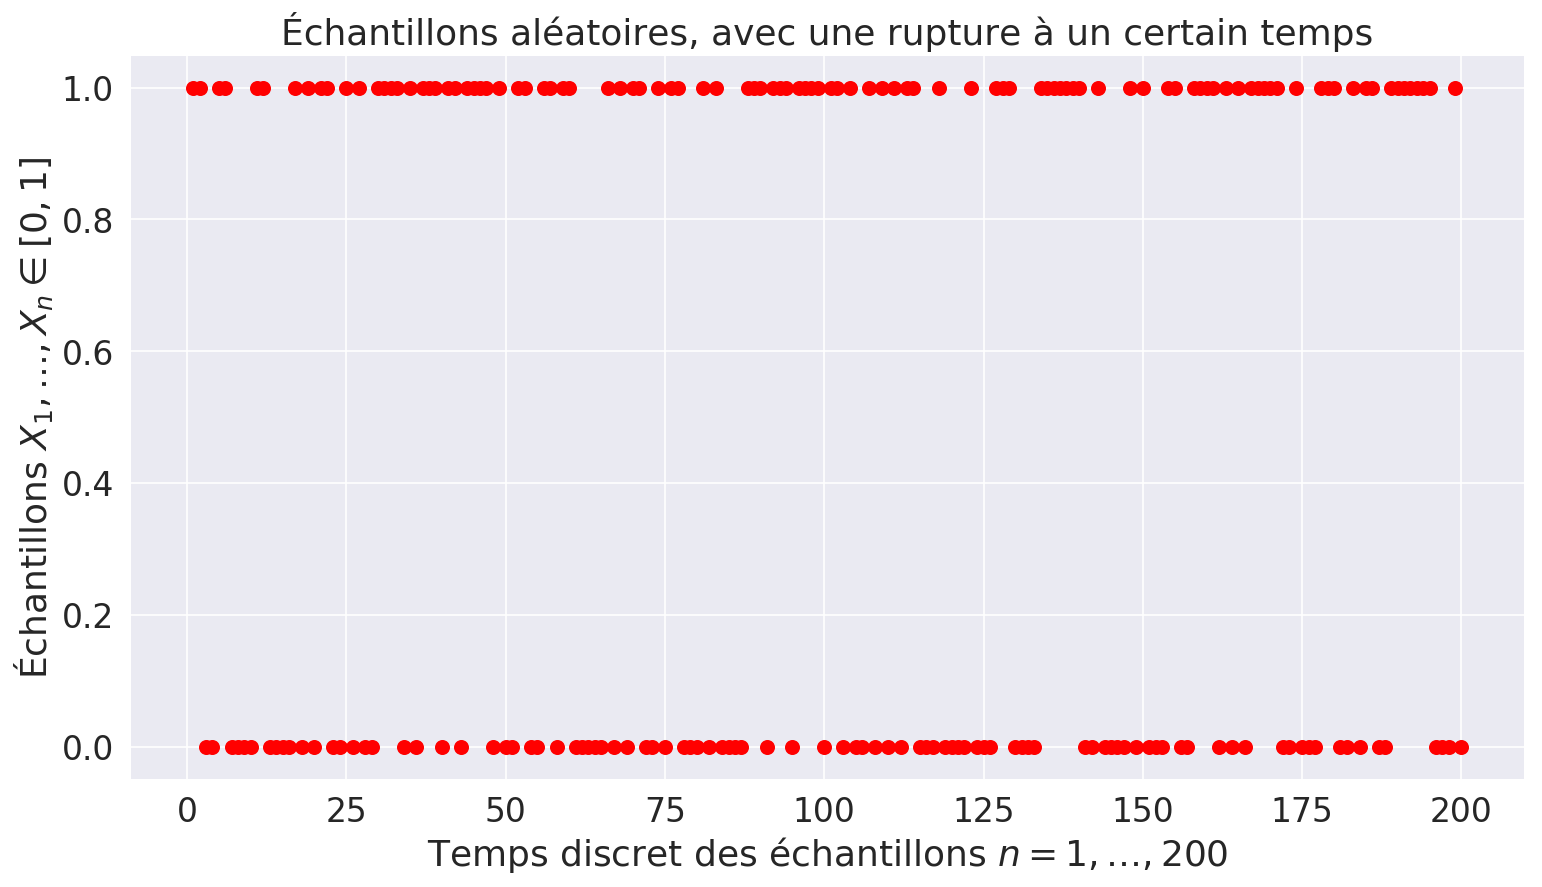

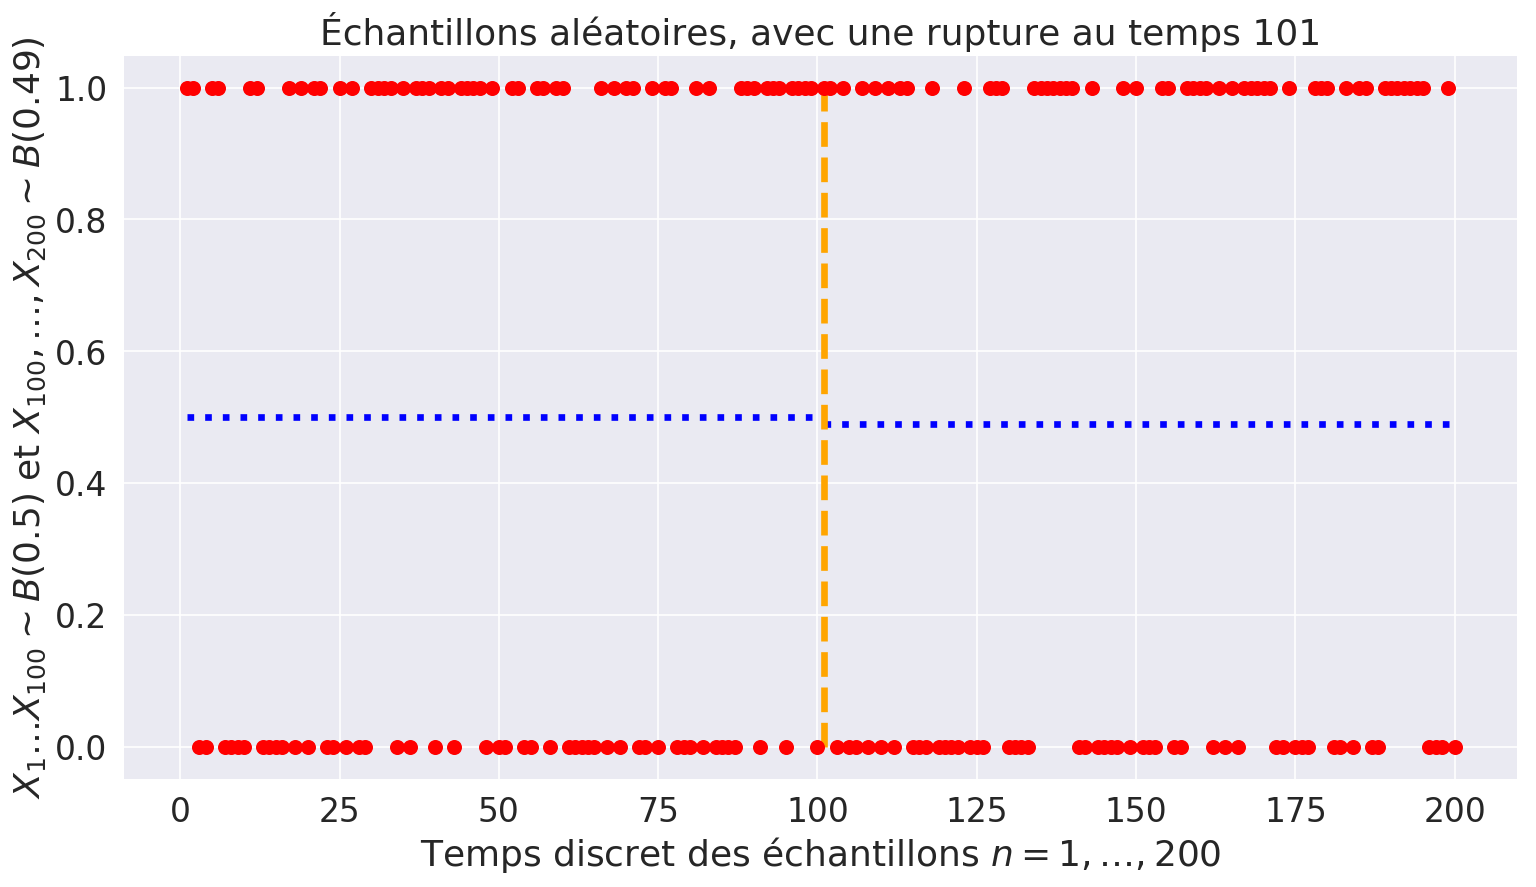

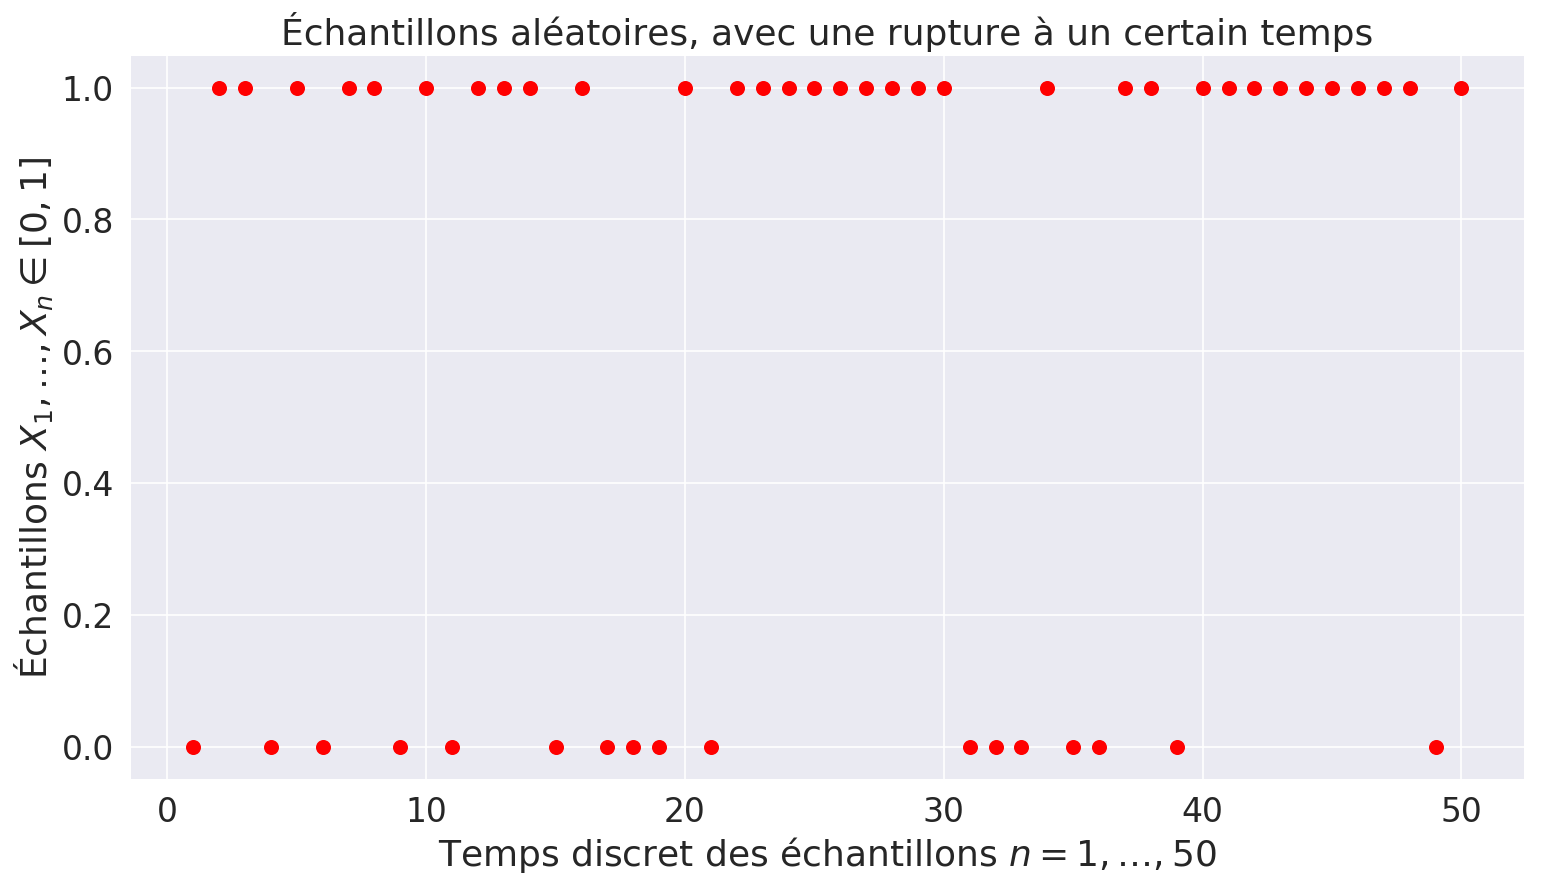

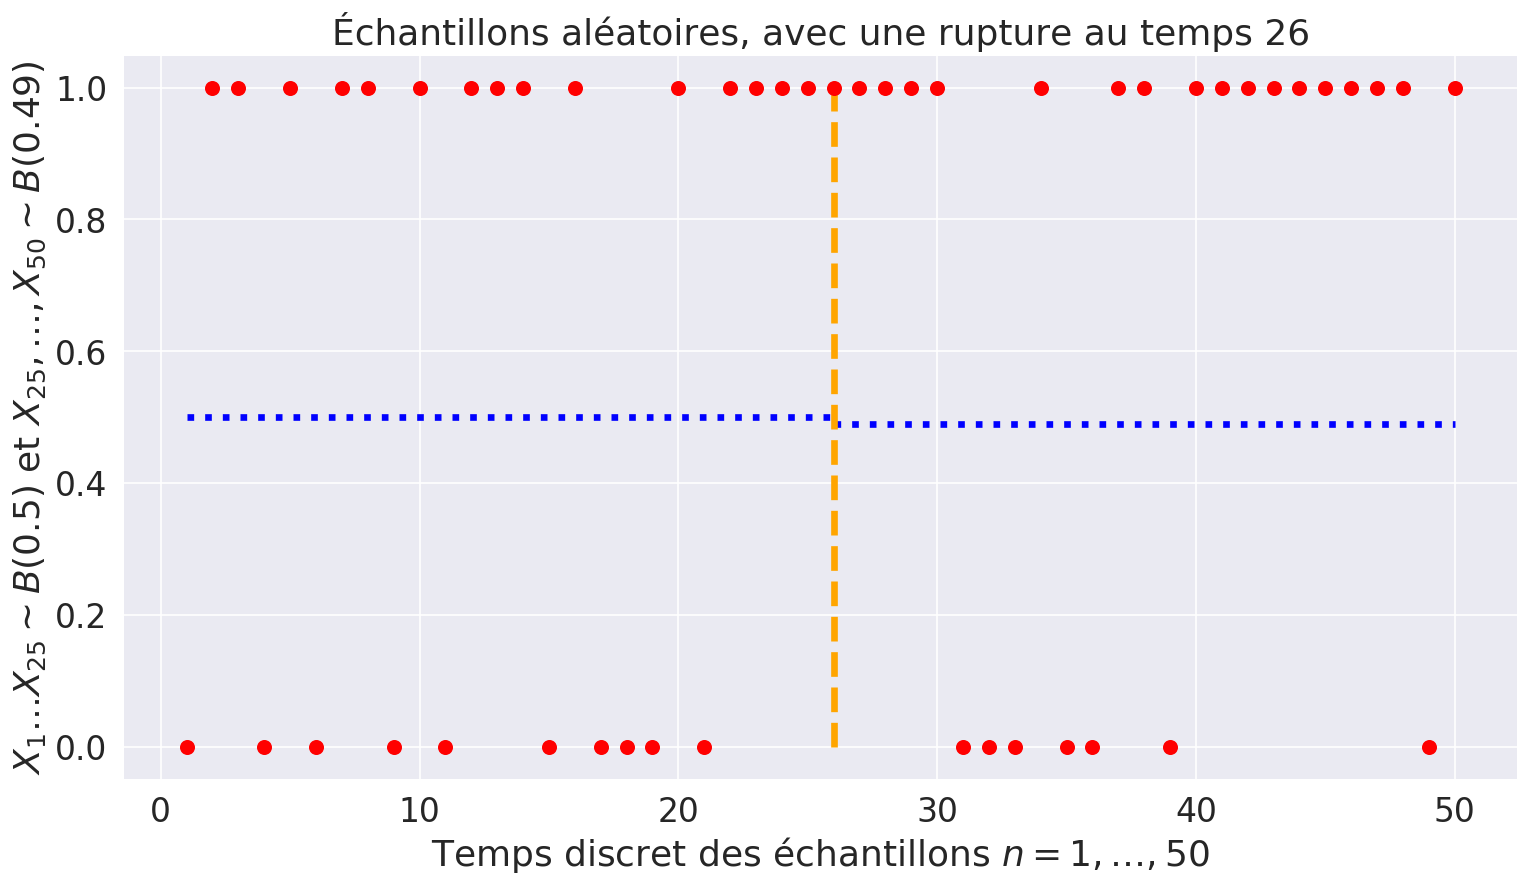

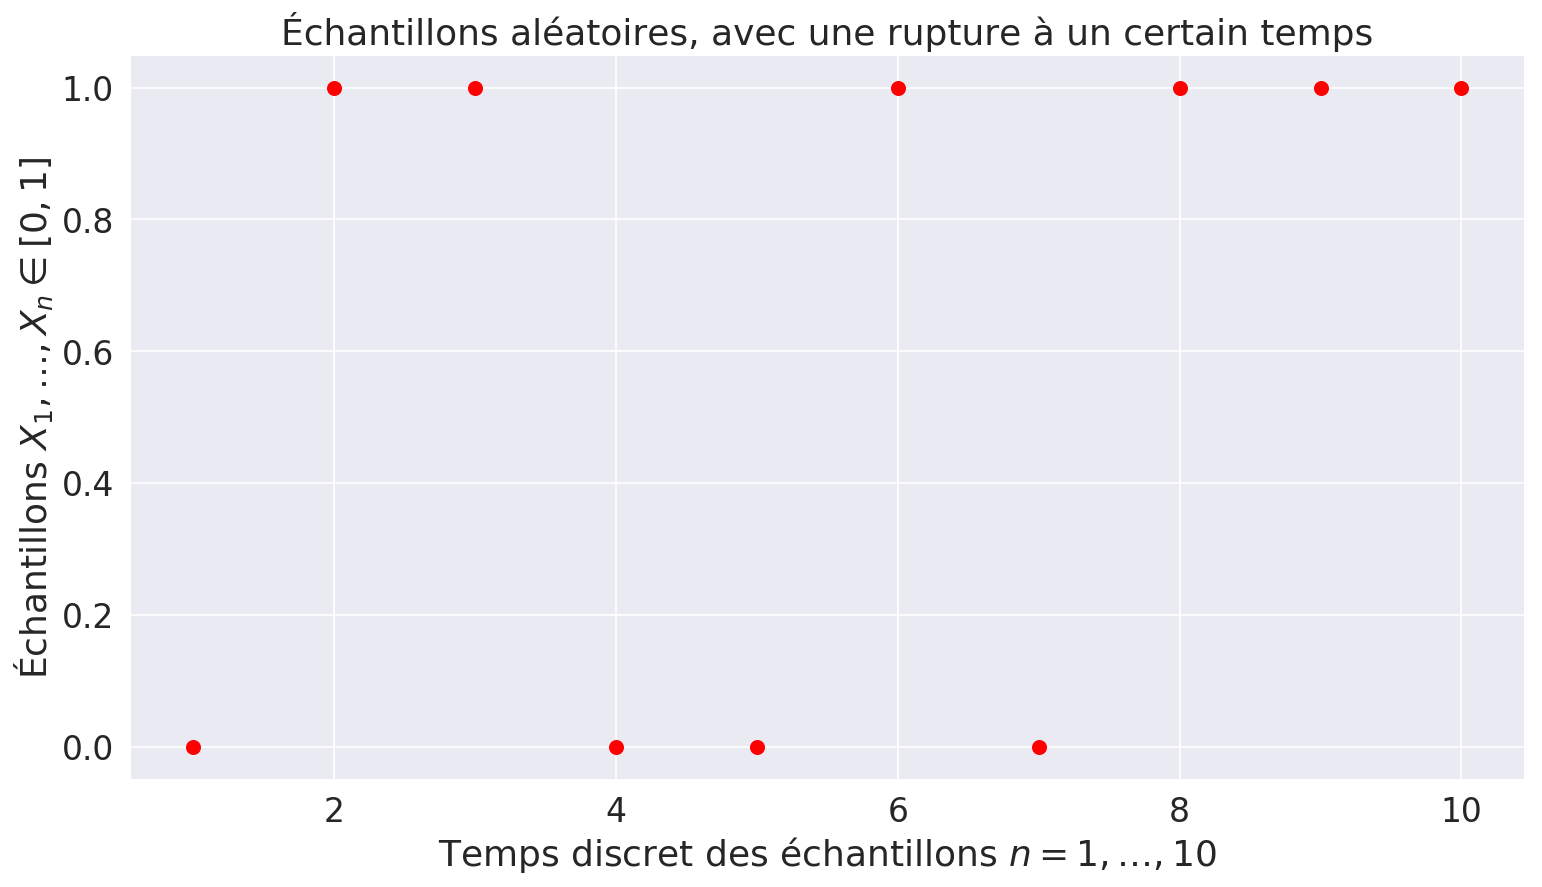

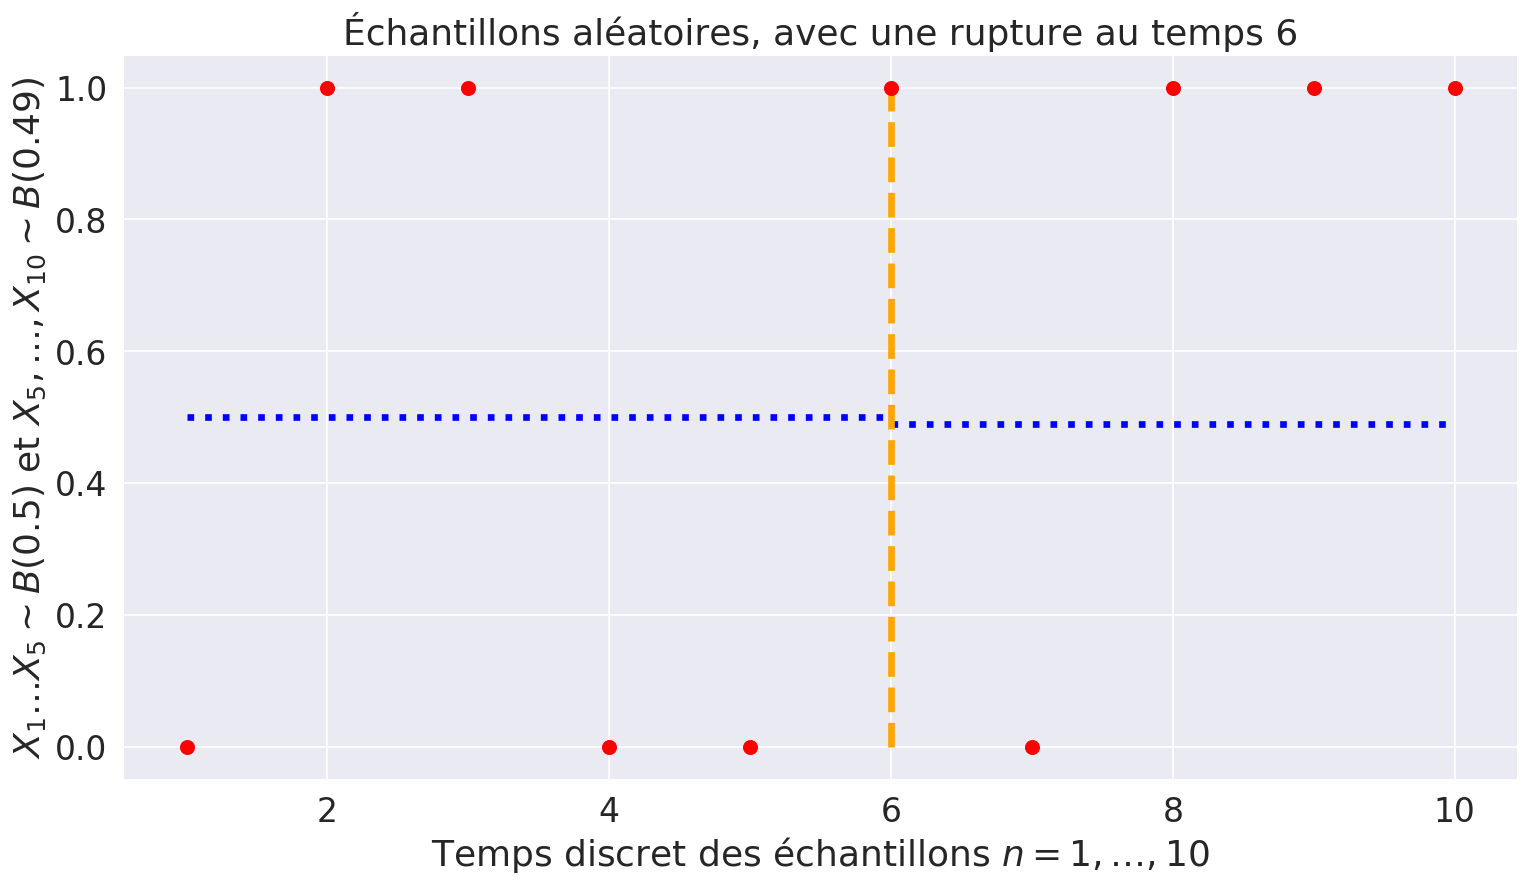

In [101]:
for dmu, dT in itertools.product(difficultes, repeat=2):
    mu = mus[dmu]
    T = Ts[dT]
    voir_echantillons(mu, dmu, T, dT, "figures_exemple_rupture/exemple_rupture")

In [102]:
ll *pdf *png

ls: impossible d'accéder à '*png': Aucun fichier ou dossier de ce type
-rw-rw-r-- 1 lilian 3263981 août  25 10:12   slides_169.pdf
-rw-rw-r-- 1 lilian 4058831 août  29 12:02   slides.pdf


## Voir les échantillons arriver

In [128]:
np.random.seed(12345)

In [129]:
def voir_echantillons_iteratif(mu, dmu, T, dT, savefig=None):
    echantillons = np.zeros(T)
    temps = np.arange(1, T + 1)
    mu_avant, mu_apres = mu[0], mu[1]
    T_avant = T//2
    echantillons[:T_avant] = np.random.binomial(1, mu_avant, T_avant)
    echantillons[T_avant:] = np.random.binomial(1, mu_apres, T_avant)
    
    for t in range(1, T + 1):
        fig = plt.figure()
        plt.xlabel(r"Temps discret des échantillons $n = 1, \dots, {}$".format(t))
        plt.ylabel(r"Échantillons $X_1, \dots, X_n \in [0,1]$")
        plt.title(r"Échantillons aléatoires, avec une rupture à un certain temps")
        plt.xlim(0.5, T + 0.5)
        plt.ylim(-0.05, 1.05)
        plt.plot(temps[:t], echantillons[:t], 'ro', markersize=16)    
        if savefig:
            plt.savefig(savefig + "__mu_" + dmu + "__T_" + dT + "_inconnu" + "__temps" + str(t) + ".png")
            plt.savefig(savefig + "__mu_" + dmu + "__T_" + dT + "_inconnu" + "__temps" + str(t) + ".pdf")
        else:
            plt.show()

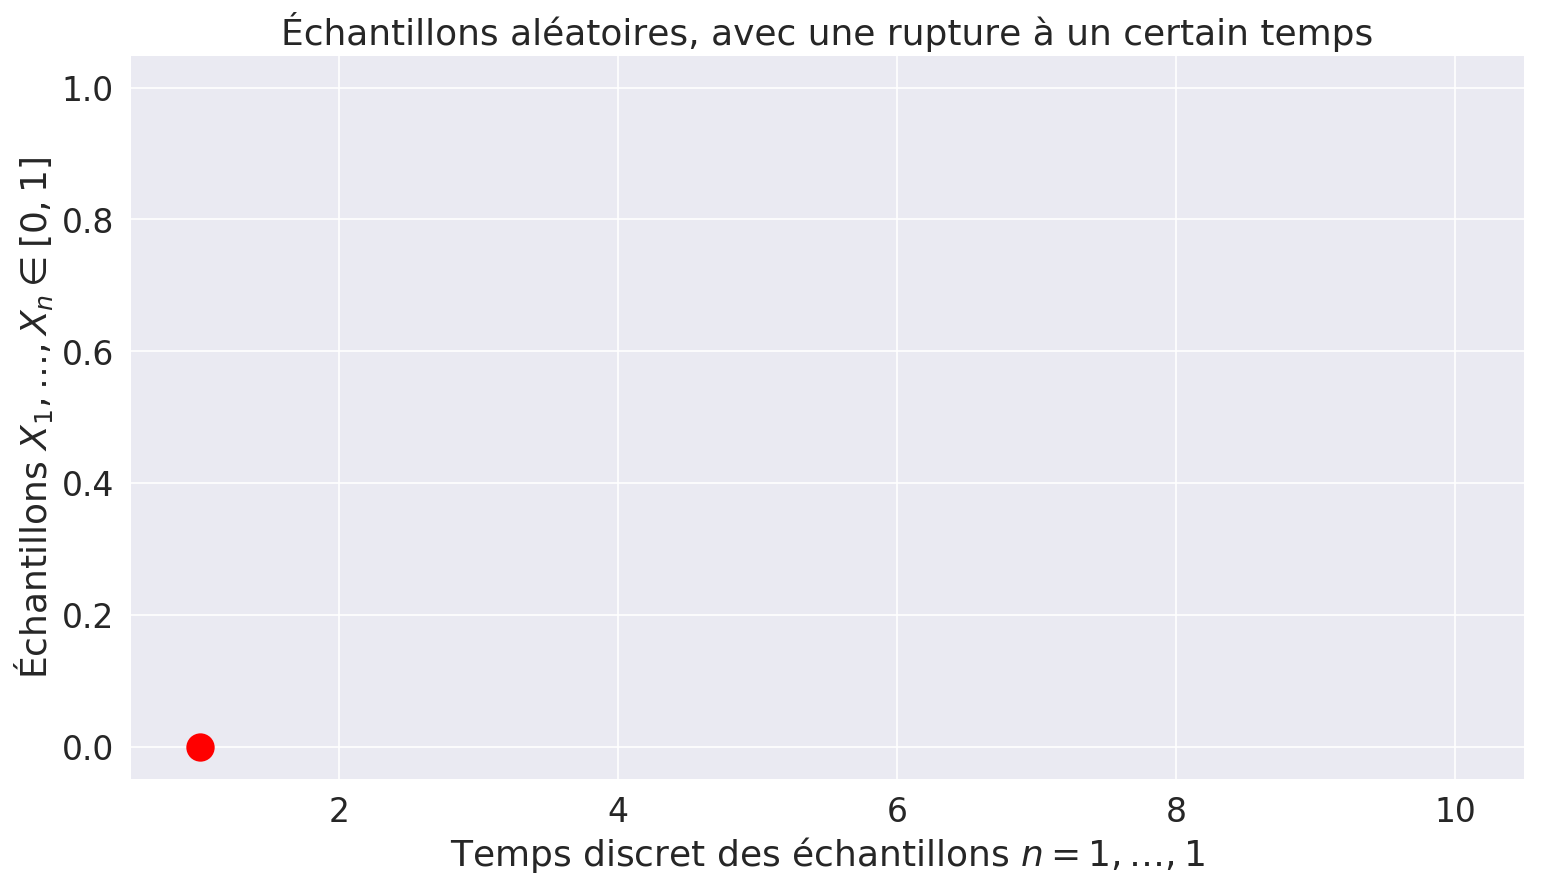

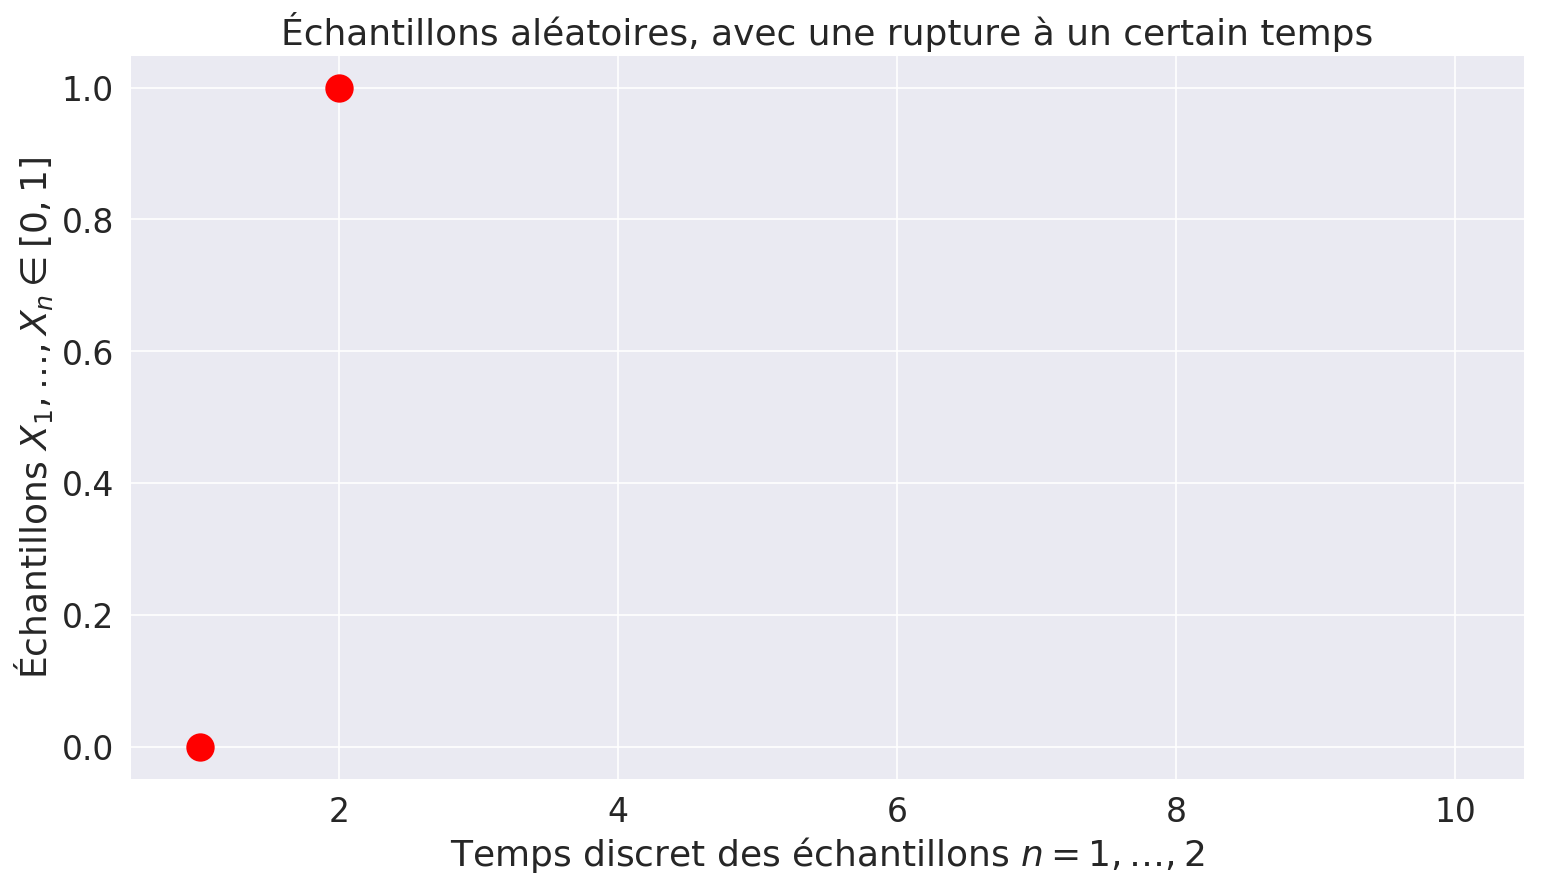

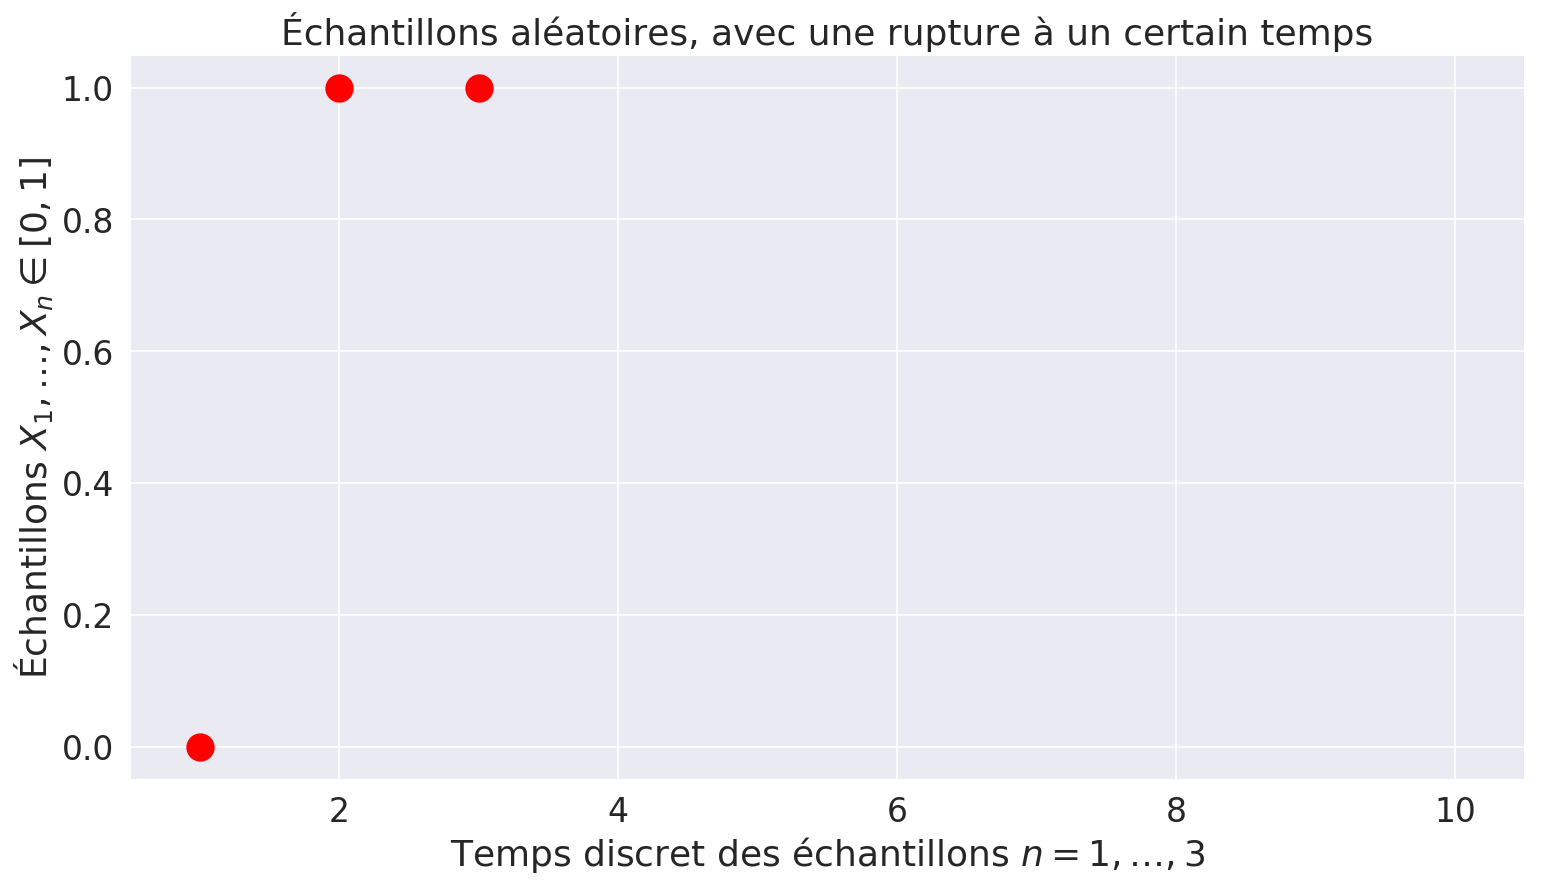

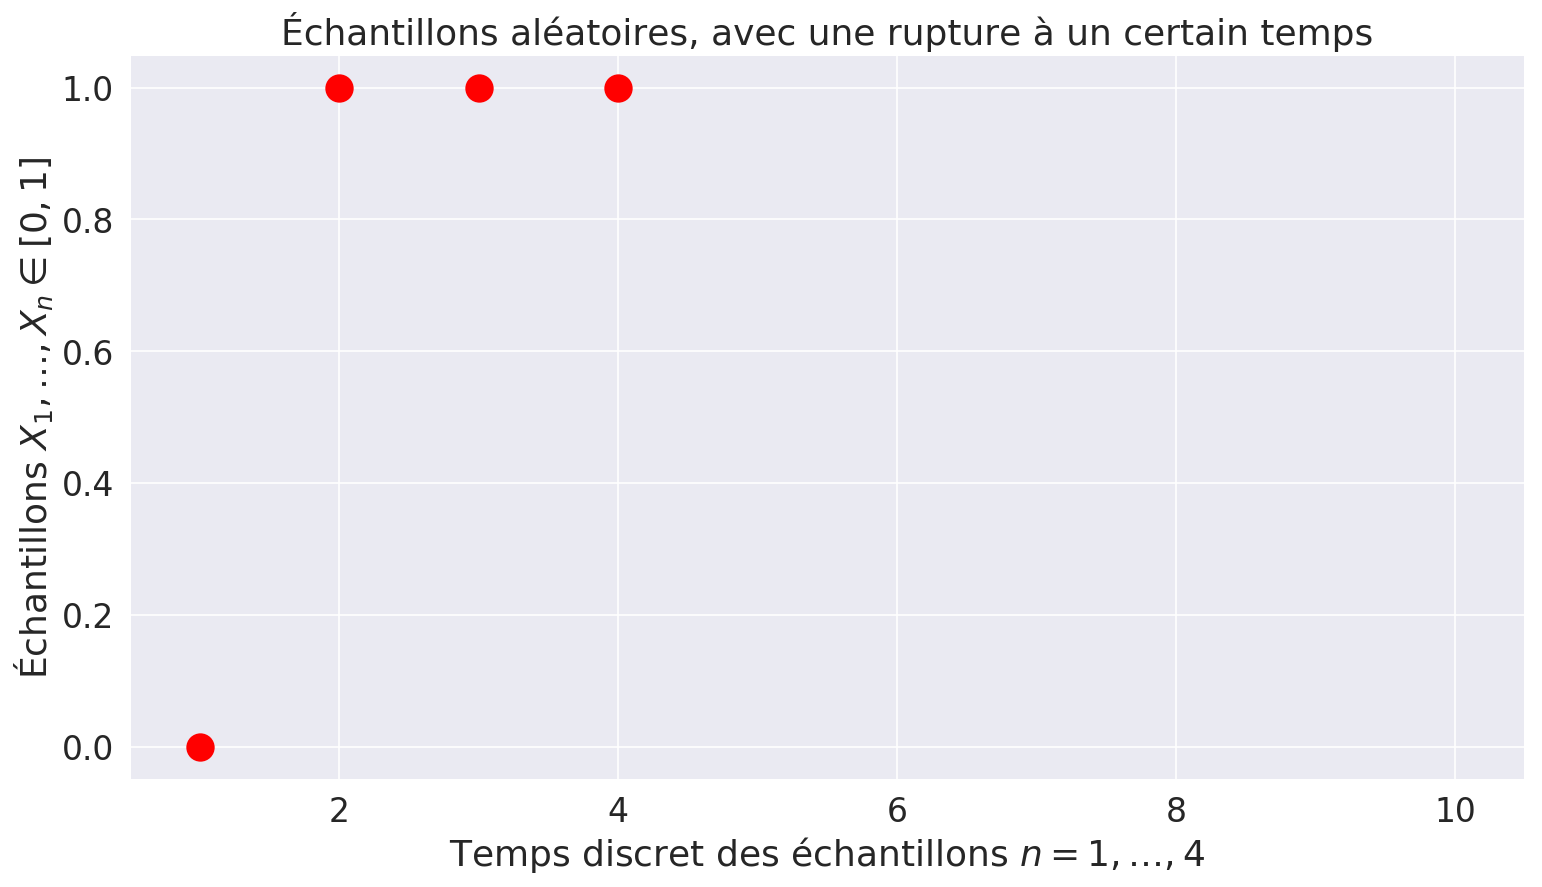

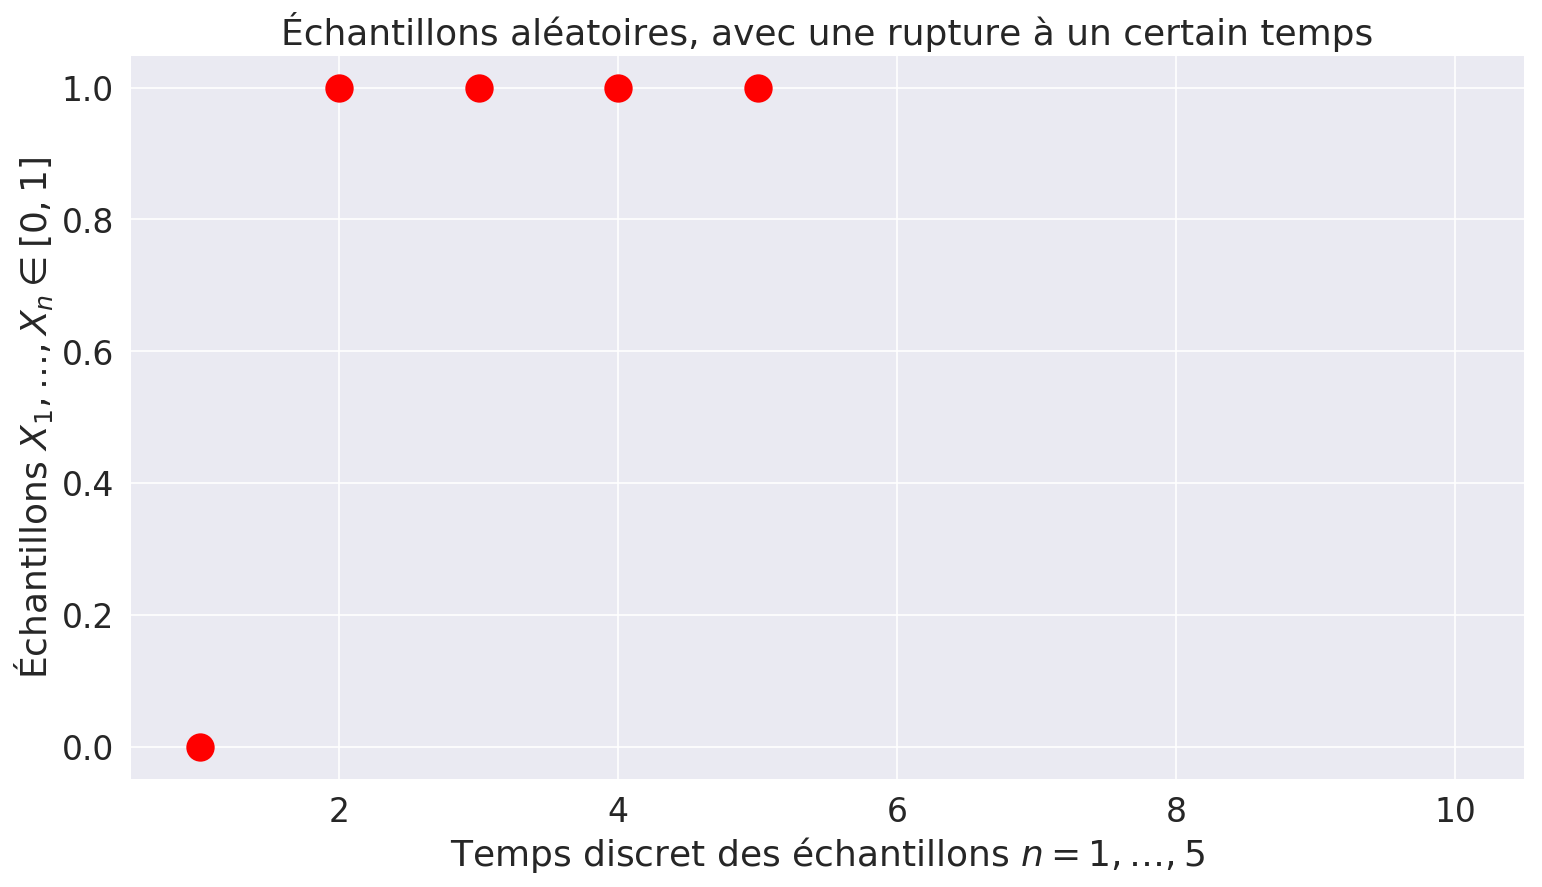

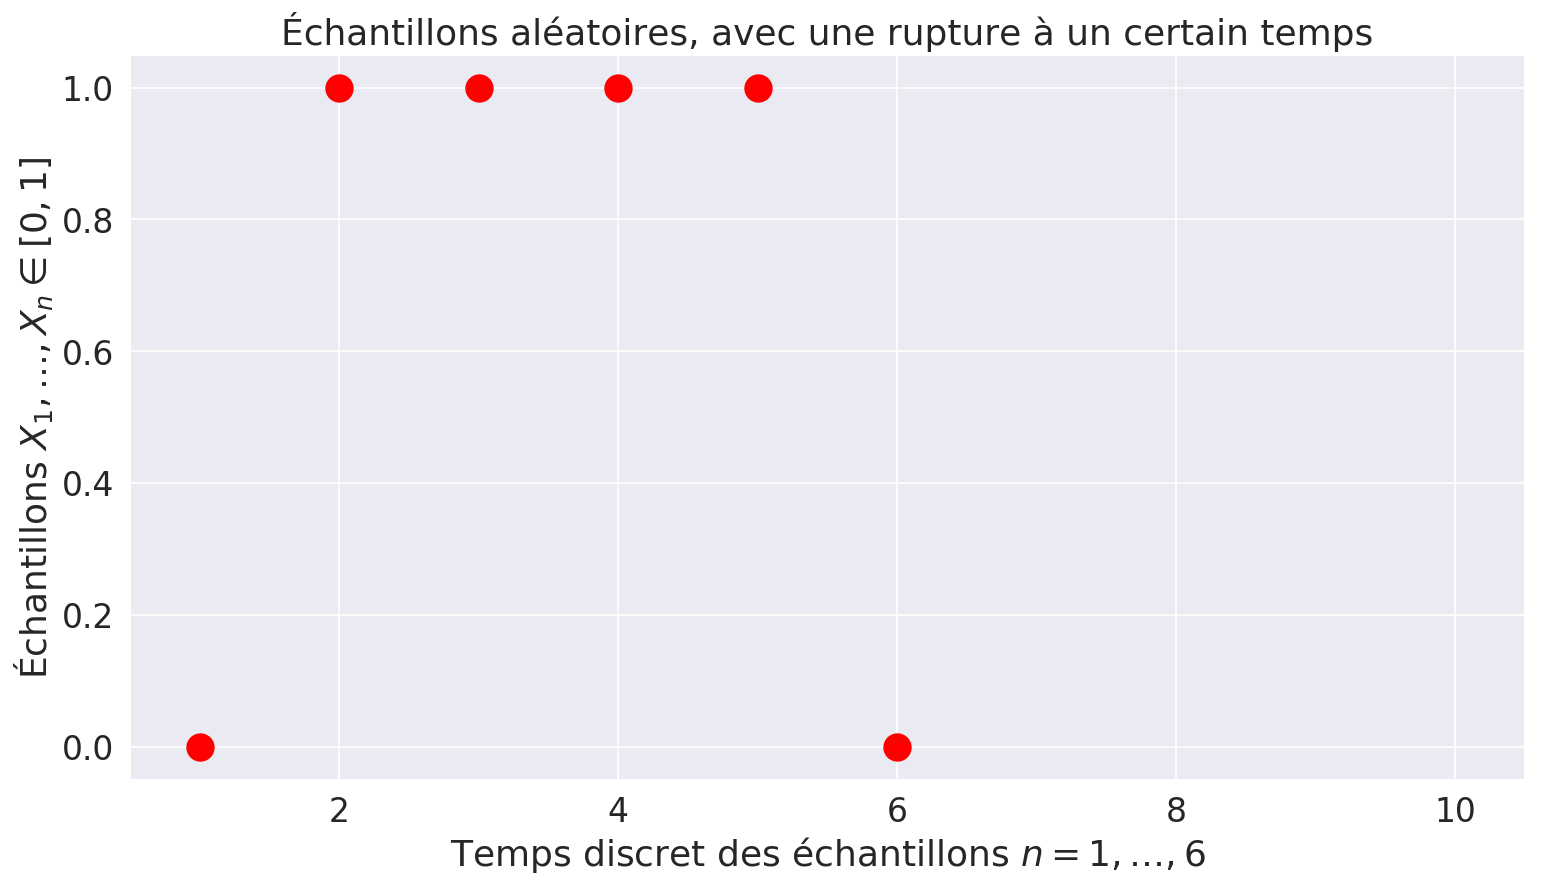

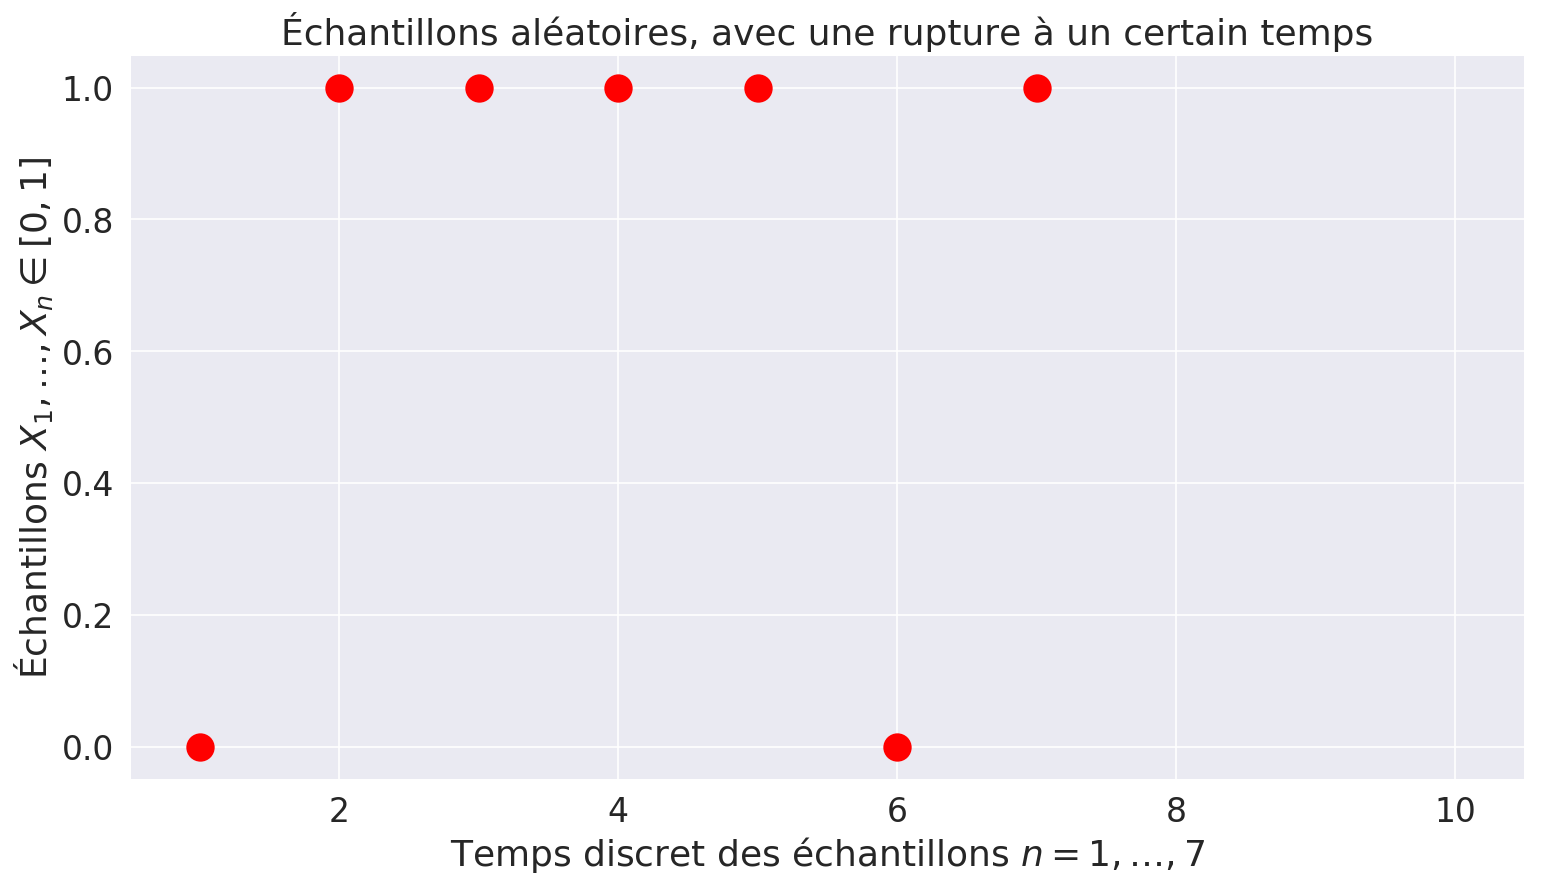

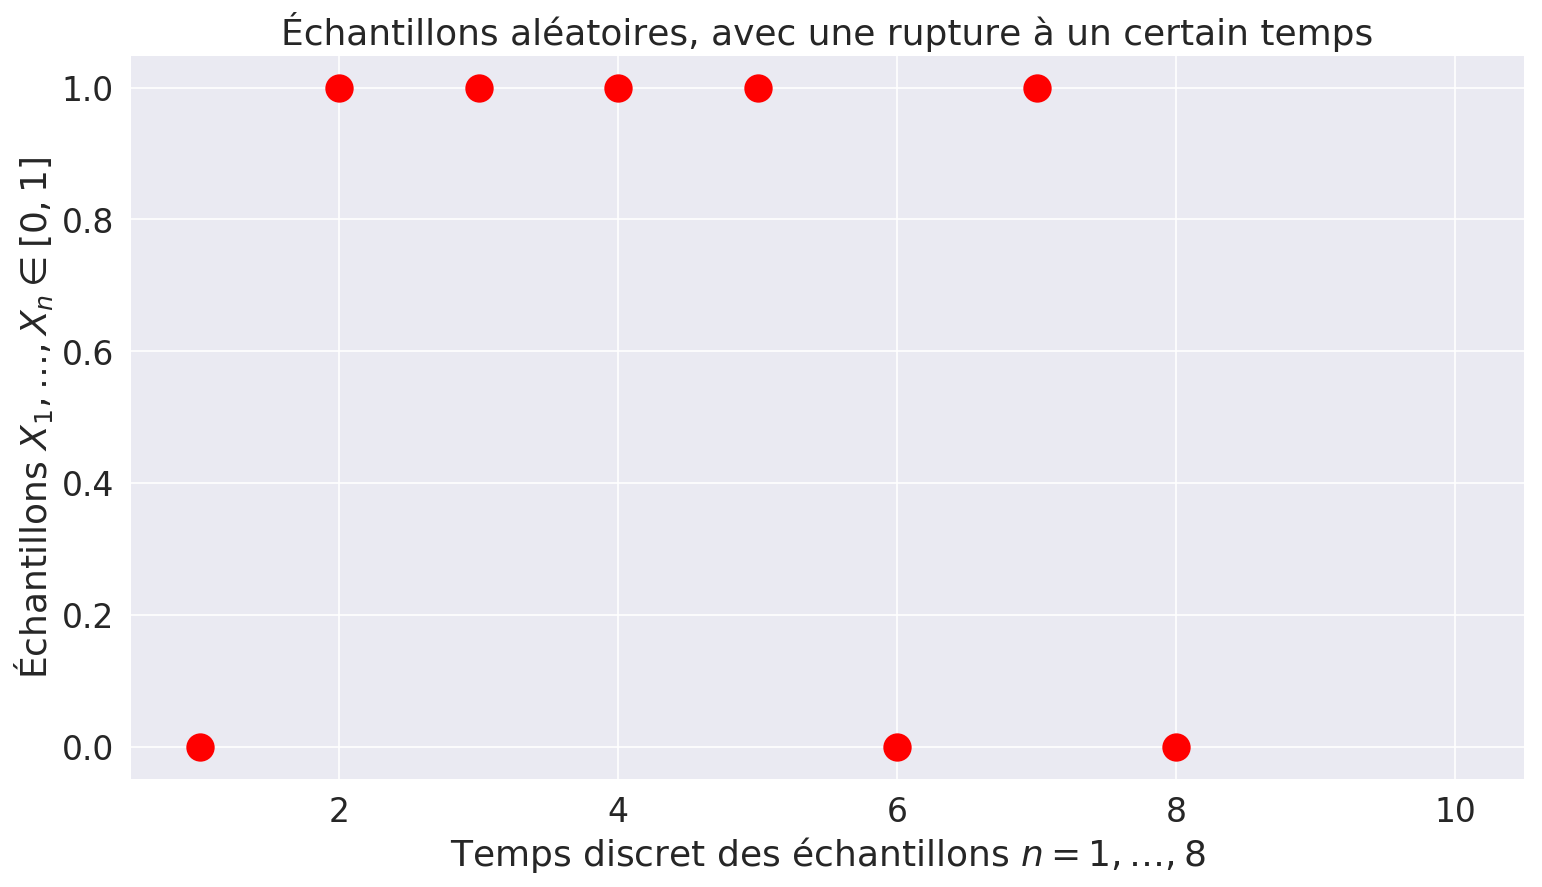

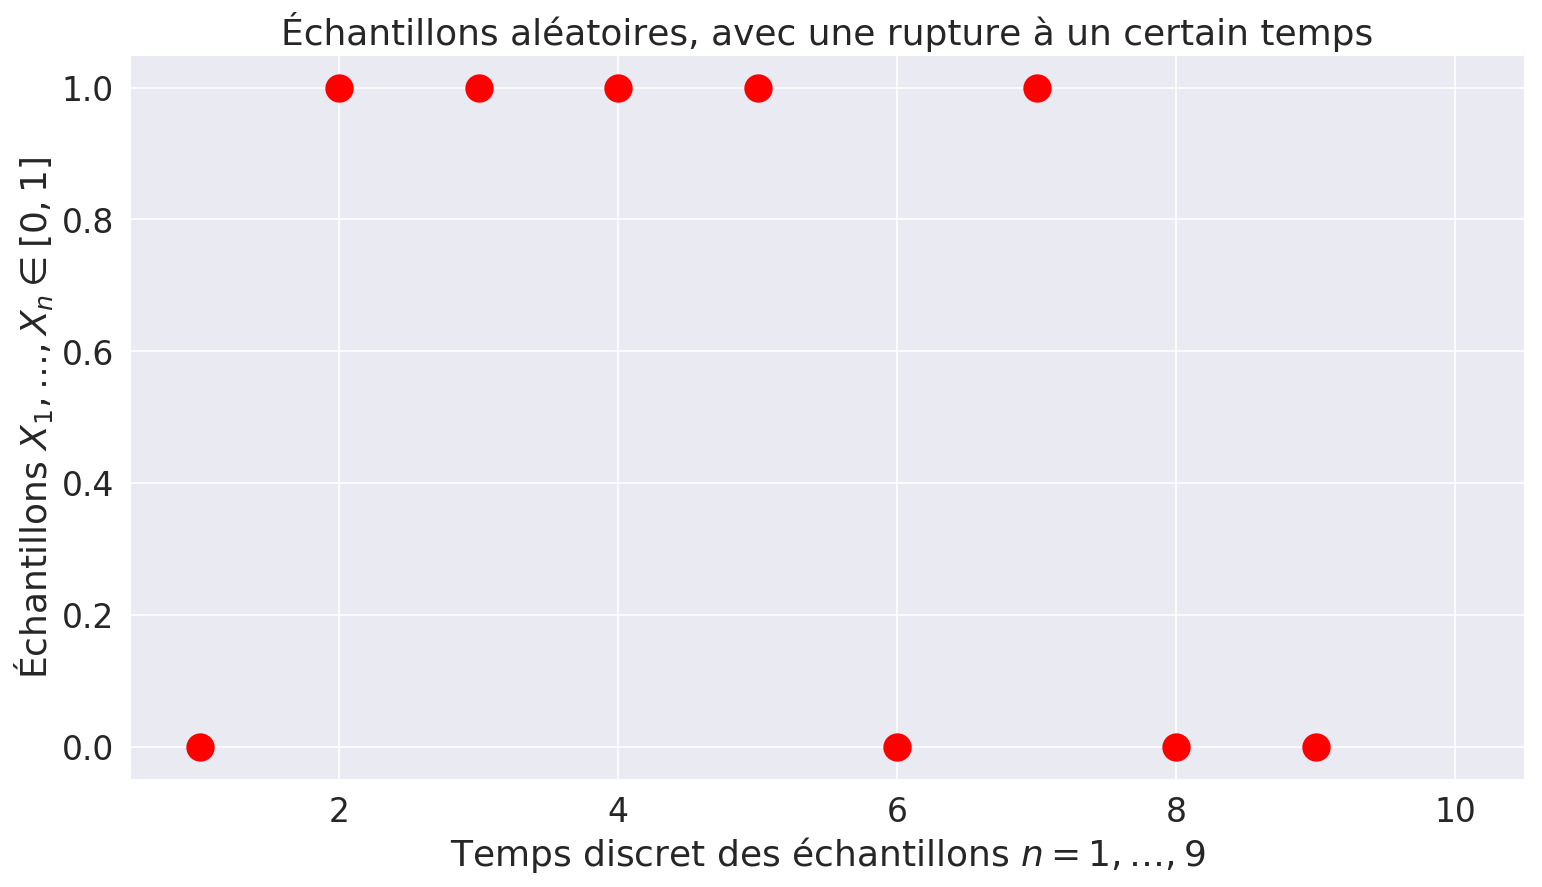

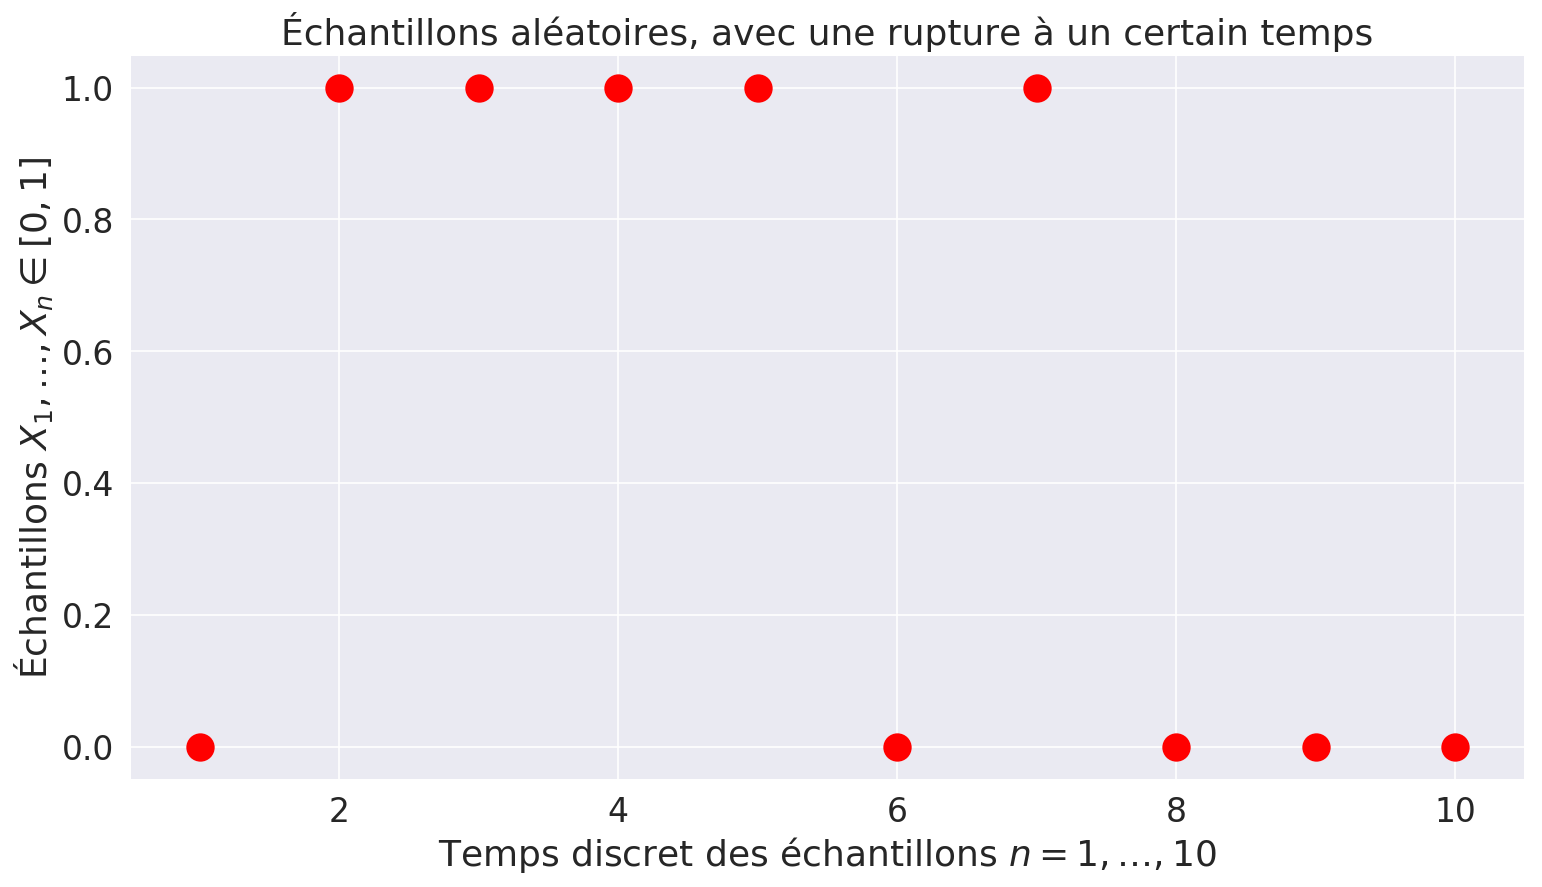

In [130]:
dmu = "facile"
dT = "difficile"
mu = mus[dmu]
T = Ts[dT]
voir_echantillons_iteratif(mu, dmu, T, dT, "figures_exemple_rupture/exemple_rupture")